# Werkboek Analytical Computing

De inleveropdracht bestaat uit vier onderdelen, die allemaal in deze Jupyter Notebook zitten. Per week lever je een deel in, waarop je vervolgens feedback krijgt. Je kan deze feedback gebruiken om je werk te verbeteren, aan het einde van het blok wordt deze Notebook als portfolio beoordeeld voor je uiteindelijke cijfer.

Iedere weekopdracht is verdeeld in een aantal deelopdrachten, dit kunnen zowel code-opdrachten (programmeer iets) als oefen-opdrachten (werk iets met de hand uit) zijn. Voor de oefen-opdrachten is een invul-cell beschikbaar die geel gemarkeerd is. Bij de code-opdrachten zal in de meeste gevallen aan het einde een test staan waarmee je kan zien of je code doet wat het moet doen. Iedere weekopdracht wordt afgesloten met een checkpoint, waar alle testen nog een keer herhaald worden. Als dit allemaal goed gaat kun je je werk op Canvas inleveren door een link naar je repository bij de juiste weekopdracht in te leveren. Ondanks de de naam "oefen-opdracht" zijn alle opdrachten summatief, en tellen alle opdrachten dus mee voor het eindcijfer.

Voor je begint: voer het eerste code-blok uit voor alle imports. In dit blok moet je ook je studentnummer invullen.

## Gebruik
In Jupyter kan je code per cel uitvoeren. Deze cel is een tekstcel, als je deze uitvoert gebeurt er in principe niets. Je kunt wel dubbelklikken op de cell om de tekst aan te kunnen passen (dit zul je moeten doen bij de opdrachten waarbij je geen code maar tekst/formules moet schrijven). Als je de cel vervolgens uitvoert komt deze er weer als opgemaakte tekst uit te zien.

Als je een code-cell uitvoert krijg je de uitvoer eronder te zien. Soms kan het zijn dat code niet uit wil voeren, zelfs code die al gegeven is. De meest gebruikelijke oorzaak is dat je een eerder code blok niet hebt uitgevoerd, waardoor Python functies of variabelen niet kan vinden. Loop de Notebook altijd van boven naar beneden door en voer in principe alles uit. Als je Jupyter afsluit en later verder gaat zal de uitvoer nog zichtbaar zijn, maar het effect van de code is niet bewaard gebleven. Je zal dan dus alle codeblokken tot waar je gebleven was opnieuw uit moeten voeren, van boven naar beneden. Gebruik de Run-knop in de toolbar of shift+enter om een blok uit te voeren.

## Good Practice (AKA voorkomen dat je werk het ineens niet meer doet)
Uitgevoerde code in een andere cel blijft in het geheugen, dus als je deze code verwijdert zie je niet meteen of je hele Notebook nog werkt. Let er daarom op als je Notebook op wilt schonen, de code soms blijft werken tot een herstart. **Als je docent de code nakijkt, start deze ook zonder alle verwijderde maar wel uitgevoerde code!** Om veilig code te verwijderen, kopieer het naar een ander document, verwijder het uit de Notebook en doe een *Restart en Run All*. Als alles nog werkt was de code niet nodig, zo niet moet je nog even goed kijken wat je weg aan het halen bent! Hanteer de volgende workflow:
- Doe regelmatig een save, en een *Kernel/Restart en Run All*.
- Ruim oude code op, en test met een *Kernel/Restart en Run All* dat alles blijft werken.
- Als alles hierna nog werkt is het mogelijk tijd voor een Git commit.


## FAQ
**Q:** Het werkt niet! Jupyter is stom! (en ik heb de sectie "Gebruik" niet gelezen)

**A:** Lees de sectie gebruik hierboven. 

**Q:** Functies / variabelen worden niet gevonden, en/of oude tests geven in een keer lange gecompliceerde errors.

**A:** Herstart je kernel en voer je code van boven naar beneden uit (*Restart en Run All* kan hierbij helpen). Waarschijnlijk heb je in de tussentijd Jupyter Notebook (of zelfs alleen je Kernel, het ding dat de code uitvoert) herstart, waardoor oude code niet meer geladen is. 

**Q:** Ik krijg errors dat een functie niet de verwachte parameters heeft, of iets van die strekking.

**A:** Mogelijk heb je een geïmporteerde functie overschreven. Herstart de kernel en voer de eerste cel opnieuw uit voor de imports. Mogelijk moet je andere cellen ook opnieuw uitvoeren, als je code functies of variabelen uit de andere cel gebruikt.

**Q:** Hoe lever ik mijn werk in?

**A:** Zie [de uitleg bij Checkpoint Alfa](#cp-alfa).

**Q:** Wanneer moet ik inleveren?

**A:** Zie [Canvas](https://canvas.hu.nl/courses/7473/assignments).

## Checkpoints
- [Alfa](#cp-alfa)
- [Bravo](#cp-bravo)
- [Charlie](#cp-charlie)
- [Delta](#cp-delta)

In [1]:
studentnr = "vul hier je studentnummer in"
studentnr = 1760105
import numpy
from ac import * # don't try this at home ^_^'
_ = RNG(studentnr)

<h3 style="color:#00cccc;">Seed geïnitialiseerd.</h3>

# Matrices en Vectoren
Deze week gaan we aan de slag met vectoren en matrices. Bekijk hiervoor eerst de video's die op Canvas gelinkt staan. Het eerste deel van deze week bestaat uit het omzetten van de wiskundige structuren in Python code. In tegenstelling tot de meeste video's, waar vectoren meestal uit 2 of 3 elementen bestaan (en matrices vaak $2\times 2$ of $3 \times 3$ zijn) kijken wij naar het meer algemene geval, waar de lengte van een vector alles kan zijn. Vectoren met lengte 2 en 3 worden veel gebruikt in graphics en natuurkunde omdat deze mooi overeen komen met 2D en 3D werelden. 

In AI worden vectoren gebruikt om data op te slaan en te bewerken, waarbij ieder getal overeen komt met een input waarde: als je bijvoorbeeld een huizenprijs wil voorspellen aan de hand van het aantal vierkante meters oppervlakte, het aantal vierkante meters tuin, de afstand tot het station en de afstand tot een supermarkt hebben we 4 input variabelen, dus 4 "dimensies". Bij neurale netwerken die met afbeeldingen werken is iedere pixel vaak een inputwaarde, en heb je voor een plaatje van 100 bij 100 dus 10000-dimensionale vectoren nodig.

In deze opdrachten werken we niet met 10000-dimensionale vectoren, maar beperken we ons tot maximaal 6 dimensies. Het is belangrijk om er meteen aan te wennen dat vectoren groter kunnen zijn dan we kunnen plotten, maar extreem hoge aantallen dimensies maken het uiteindelijk voor meer rekenwerk en minder overzichtelijk.

Aan het einde van deze week hebben we onze eigen functies geschreven voor lineaire algebra, en zullen we deze gebruiken om een simpel getraind neuraal netwerk zonder activatiefunctie door te rekenen.

## Opdracht 0
Bij vectoren is geen sprake van "negatief" en "positief", zoals dat bij normale getallen wel het geval is. Wel heeft iedere vector een negatiev_e_ (ook wel *additieve inverse* of *omgekeerde*). Deze vector is dus zelf niet negatief te noemen, waar wel negatief ten opzichte van een andere vector; deze vectors zijn elkaars negatieve. Bij normale getallen is de negatieve van $n$ bijvoorbeeld $-n$, en van $-n$ weer $n$. Bij een vector wordt van ieder element (getal) los de negatieve genomen, bijvoorbeeld:

$$ \text{als}\ v=
\begin{bmatrix}
  1\\
  -3\\
  7\\
\end{bmatrix}\quad \text{dan}\ -v = 
\begin{bmatrix}
  -1\\
  3\\
  -7\\
\end{bmatrix}$$

De code hieronder genereert zes willekeurige vectoren. Voer de code uit en gebruik het tekstblok eronder om de sommen en negatieven te geven.

In [2]:
RNG().set(0)

random_tensor(r"\vec u")
random_tensor(r"\vec v")
random_tensor(r"\vec w",3)
random_tensor(r"\vec x",3)
random_tensor(r"\vec y",5)
random_tensor(r"\vec z",5)

<IPython.core.display.Math object>

<details><pre>$\vec u =  \begin{bmatrix}   7\\   1\\   5\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec v =  \begin{bmatrix}   16\\   -10\\   -16\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec w =  \begin{bmatrix}   -8\\   -16\\   17\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec x =  \begin{bmatrix}   -8\\   -12\\   -19\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec y =  \begin{bmatrix}   17\\   -7\\   13\\   9\\   8\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec z =  \begin{bmatrix}   -13\\   15\\   -18\\   14\\   11\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">

### Negatieve en Sommen
Vul hier de negatieven in van de vectoren hierboven. Gebruik het voorbeeld hierboven voor de juiste LaTeX-notatie.

$-\vec u =  \begin{bmatrix} -7\\ -1\\ -5\\ \end {bmatrix}$ 

$-\vec v = \begin{bmatrix} -16\\ 10\\ 16\\ \end {bmatrix}$ 

$-\vec w + \vec x = \begin{bmatrix} 0\\ 4\\ -36\\ \end {bmatrix}$ 

$-\vec y - \vec z = \begin{bmatrix} -4\\ -8\\ 5\\ -23\\ -19\\ \end {bmatrix}$ 
    
</div>

## Opdracht 1
Maak een functie die twee vectoren bij elkaar optelt. De vectoren zijn Numpy arrays. Het is de bedoeling dat je deze opgave zelf oplost, en dus geen gebruik maakt van de Numpy functionaliteit om twee arrays op te tellen.
Gebruik onderstaande functie als basis voor je oplossing; in de cel eronder staan een paar test-cases, waaraan je kunt zien of je oplossing correct is.
Als de gebruiker twee vectoren van verschillend formaat meegeeft moet Python een `DimensionError` geven; dit kan met `raise DimensionError("Vectors niet hetzelfde formaat")`.

In [3]:

def vector_addition(u: np.ndarray, v: np.ndarray) -> np.ndarray: # TODO
    vectorSum = []
    if len(u) != len(v):
        raise DimensionError("Vectors niet hetzelfde formaat")
    else:
        for i in range(len(u)):
            vectorSum.append(u[i]+v[i])


    return numpy.array(vectorSum)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_valid_addition` | $\vec u + \vec v$ klopt  |
| `test_additive_unit` | $\vec u + \vec 0 = \vec u$ ($\vec 0$ is de vector van de juiste lengte met alleen maar 0 waardes) |
| `test_additive_unit2` | $\vec 0 + \vec u = \vec u$ |
| `test_test_invalid_addition` | $\vec v + \vec w$ geeft een `DimensionError` als de dimensies niet kloppen |


In [4]:
test_vector_addition(vector_addition)

test_additive_unit (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_additive_unit_2 (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_invalid_addition (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_numpy_array (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok
test_valid_addition (ac_tests.test_vector_addition.<locals>.TestVectorAddition) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.024s

OK


## Opdracht 2
Maak een functie die de negatieve van een vector geeft. Je mag niet geen gebruik maken van de Numpy functionaliteit om `-` op een hele array toe te passen.

Ook hier moet je gebruik maken van het gegeven functie-template, en zijn test-functies beschikbaar. Voor alle volgende opdrachten geldt hetzelfde, tenzij anders aangegeven. Ook zal niet bij iedere opdracht expliciet vermeld worden dat je niet de ingebouwede Numpy-functionaliteit mag toepassen, dit wordt vanaf hier als bekend verondersteld.

In [5]:
def negative_of_vector(v: np.ndarray) -> np.ndarray: # TODO
    negativeVector = []
    for i in range (len(v)):
        negativeVector.append(-1*v[i])
    
    return numpy.array(negativeVector)


### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_negative_of_vector` | $-\vec v$ klopt  |
| `test_negative_of_zero` | $- \vec 0 = \vec 0$ (de vector van de juiste lengte met alleen maar 0 waardes) |
| `test_sum_vector_negative_is_zero` | $\vec v + (-\vec v) = \vec 0$ |


In [6]:
test_negative_of_vector(negative_of_vector, vector_addition)

test_negative_of_vector (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok
test_negative_of_zero (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok
test_numpy_array (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok
test_sum_vector_negative_is_zero (ac_tests.test_negative_of_vector.<locals>.TestNegativeOfVector) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.007s

OK


## Opdracht 3
Nu gaan we ons op vermenigvuldiging richten. Dit concept is in de lineaire algebra minder eenduidig dan met normale getallen: er zijn verschillende operaties die "vermenigvuldiging" genoemd worden. Voor het vermenigvuldigen van vectoren zijn er drie die ons op dit moment interesseren: 
 - vermenigvuldigen van een vector met een getal, met als resultaat een vector *(scalaire vermenigvuldiging)*
 - vermenigvuldigen van twee vectoren, met als resultaat een getal *(inwendig product)*
 - vermenigvuldigen van een vector en een matrix, met als resultaat een vector *(toepassen van een matrix als lineaire transformatie)*
 
Voor deze opdracht gaan we de eerste vorm uitwerken: scalaire vermenigvuldiging, oftewel vermenigvuldiging met een getal *(scalar)*. Hier wordt een vector als het ware "geschaald". Denk hiervoor aan vectoren als pijlen in een 2D ruimte: de richting van de pijl verandert *in principe** niet, maar de lengte wordt groter (of kleiner, als de scalar minder dan 0 is). De enige manier waarop een pijl wel van richting verandert is als deze met een negatief getal wordt vermenigvuldigt: de richting keert dan om. De pijl ligt nog wel op dezelfde lijn, maar wijst een andere kant op.

Als we teruggaan naar ons plaatje van vectoren als lijsten met getallen dan betekent scalaire vermenigvuldiging dat ieder getal afzonderlijk met de scalar vermenigvuldigd wordt:

$$ 2
\begin{bmatrix}
  1\\
  -3\\
  7\\
\end{bmatrix} = 
\begin{bmatrix}
  2 \cdot 1 \\
  2 \cdot -3 \\
  2 \cdot 7 \\
\end{bmatrix}= 
\begin{bmatrix}
  2\\
  -6\\
  14\\
\end{bmatrix}$$

$$ \left(-\frac{1}{3}\right)
\begin{bmatrix}
  3\\
  6\\
  2\\
  9\\
\end{bmatrix} = 
\begin{bmatrix}
  -\frac{1}{3} \cdot 3 \\
  -\frac{1}{3} \cdot 6 \\
  -\frac{1}{3} \cdot 2 \\
  -\frac{1}{3} \cdot 9 \\
\end{bmatrix}= 
\begin{bmatrix}
  -1\\
  -2\\
  -\frac{2}{3} \\
  -3\\
\end{bmatrix}$$

Hieronder staan weer zes willekeurge vectoren, $\vec u$ t/m $\vec z$ (als je ze niet ziet, voer dan eerst het code-blok uit). Gegeven deze vectoren, bereken de scalaire vermenigvuldigingen in het tekstblok eronder. De laatste twee zijn een voorbeeld van *lineaire combinaties*, waar we later meer van zullen zien.

In [7]:
RNG().set(1)

random_tensor(r"\vec u")
random_tensor(r"\vec v")
random_tensor(r"\vec w",2)
random_tensor(r"\vec x",2)
random_tensor(r"\vec y",4)
random_tensor(r"\vec z",4)

<IPython.core.display.Math object>

<details><pre>$\vec u =  \begin{bmatrix}   16\\   -3\\   19\\   -11\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec v =  \begin{bmatrix}   4\\   -3\\   -8\\   -20\\   -10\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec w =  \begin{bmatrix}   9\\   17\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec x =  \begin{bmatrix}   -19\\   -6\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec y =  \begin{bmatrix}   9\\   0\\   19\\   -15\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec z =  \begin{bmatrix}   7\\   15\\   18\\   -4\\ \end{bmatrix}$</pre></details>

<a id='opdr3'></a>
<div style="background:#fffff0;">

### Vermenigvuldigen en Lineaire Combinaties

$3\vec{u} = \begin{bmatrix} 48\\ -9\\ 57\\ -33\\ \end{bmatrix}$

$-5\vec{v} = \begin{bmatrix} -20\\ 15\\ 40\\ 100\\ 50\\ \end{bmatrix}$

$\frac{1}{2} \vec{v} = \begin{bmatrix} 2\\ -1.5\\ -4\\ -10\\ -5\\ \end{bmatrix}$

$3\vec{w} + 4\vec{x} = \begin{bmatrix} 27\\ 51\\ \end{bmatrix} + \begin{bmatrix} -57\\ -18\\ \end{bmatrix} = \begin{bmatrix} -30\\ 33\\ \end{bmatrix} $

$8\vec{y} - \frac{1}{2}\vec{z} = \begin{bmatrix} 72\\ 0\\ 152\\ -120\\ \end{bmatrix} - \begin{bmatrix} 3.5\\ 7.5\\ 9\\ -2\\ \end{bmatrix} = \begin{bmatrix} 68.5\\ -7.5\\ 143\\ -118\\ \end{bmatrix}$
    
</div>

## Opdracht 4
Maak een functie die de scalaire vermenigvuldiging van een scalar en een vector geeft.

In [8]:
def scalar_product(s: int, v: np.ndarray) -> np.ndarray: # TODO
    productVector = []
    for i in range (len(v)):
        productVector.append(s*v[i])
        
        
           
    return numpy.array(productVector)

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_zero` | $0\vec v = \vec 0$ (de vector van de juiste lengte met alleen maar 0 waardes) |
| `test_unit` | $1\vec v = \vec v$ |
| `test_double` | $2\vec v = \vec v + \vec v$ |
| `test_distributive_vector` | $a(\vec u + \vec v) = a \vec u + a \vec v$ |
| `test_distributive_field` | $(a+b)\vec v = a \vec v + b \vec v$|


In [9]:
test_scalar_product(scalar_product, vector_addition)

test_distributive_field_a (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_distributive_field_b (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_distributive_vector_a (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_distributive_vector_b (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_double (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_numpy_array (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_unit (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok
test_zero (ac_tests.test_scalar_product.<locals>.TestScalarProduct) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.014s

OK


## Opdracht 5
Het tweede product is een product tussen twee vectoren van hetzelfde formaat. Het resultaat van de vermenigvuldiging is een scalar (getal). Twee vectoren hebben alleen een inwendig product als ze zich in dezelfde ruimte bevinden, oftewel ze dezelfde dimensie hebben. Voor het inwendige product bestaan verschillende vormen van notatie, de meest voorkomende zijn $\langle \vec u | \vec v \rangle$,  $\langle \vec u, \vec v \rangle$ en $\vec u \cdot \vec v$. In deze notebook gebruiken we de eerste variant.

Hieronder staan vijf willekeurge vectoren, $\vec u$ t/m $\vec z$. Gegeven deze vectoren, vul de tabel in het tekstblok eronder in met de inwendige producten (of zet een $\bot$ als de vermenigvuldiging niet kan).

In [10]:
RNG().set(2)

random_tensor(r"\vec u",2)
random_tensor(r"\vec v",3)
random_tensor(r"\vec w",2)
random_tensor(r"\vec x",4)
random_tensor(r"\vec y",4)

<IPython.core.display.Math object>

<details><pre>$\vec u =  \begin{bmatrix}   2\\   15\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec v =  \begin{bmatrix}   -20\\   -8\\   -3\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec w =  \begin{bmatrix}   -10\\   -13\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec x =  \begin{bmatrix}   -11\\   15\\   -15\\   -6\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec y =  \begin{bmatrix}   -10\\   -2\\   -5\\   5\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">
    
### Inwendige producten

$\begin{array}{|r|c|c|c|c|c|} \hline
& \vec u & \vec v & \vec w & \vec x & \vec y \\ \hline
\vec u & 229
       & ⊥
       & -215
       & ⊥
       & ⊥
       \\ \hline
\vec v & ⊥
       & 473
       & ⊥
       & ⊥
       & ⊥
       \\ \hline
\vec w & -215
       & ⊥
       & 269
       & ⊥
       & ⊥
       \\ \hline
\vec x & ⊥
       & ⊥
       & ⊥
       & 607
       & 125
       \\ \hline
\vec y & ⊥
       & ⊥
       & ⊥
       & 125
       & 154
       \\ \hline
\end{array}$

#### Wat valt je op qua symmetrie aan de tabel?
Is $\langle \vec u | \vec v\rangle$ hetzelfde als $\langle \vec v | \vec u \rangle$?

### Ja,  bij  het  optellen maakt de volgorde niet uit.

Heeft $\langle \vec u | \vec u \rangle$ een speciale betekenis? Of de wortel daarvan?

### Dit is eigenlijk het kwadraat van de vector. De wortel hiervan is gewoon weer vector u.
    
</div>

## Opdracht 6
Maak een functie die het inwendig product van een twee vectoren geeft. Net als bij het optellen moet Python een `DimensionError` geven als de vectoren niet hetzelfde formaat hebben.

In [11]:
def inner_product(u: np.ndarray, v: np.ndarray) -> np.ndarray: # TODO
    innerProduct = 0
    if len(u) != len(v):
        raise DimensionError("Vectors niet hetzelfde formaat")
    else:
        for i in range (len(u)):
            innerProduct += (u[i]*v[i])

    return numpy.array(innerProduct)
        

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_valid_product` | $\langle \vec u | \vec v \rangle $ werkt |
| `test_invalid_product` | $\langle \vec v | \vec w \rangle$ geeft een `DimensionError` als de dimensies niet kloppen |
| `test_zero` | $\langle \vec v | \vec 0 \rangle = 0$ |
| `test_positive_definite` | $\langle \vec v | \vec v \rangle > 0$ zolang $\vec v$ niet $\vec 0$ is |
| `test_commutative` | $\langle \vec u | \vec v \rangle = \langle \vec v | \vec u \rangle$ |
| `test_linear1` | $\langle a\vec v | \vec u \rangle = a \langle \vec v | \vec u \rangle$ |
| `test_linear2` | $\langle \vec v | a\vec u \rangle = a \langle \vec v | \vec u \rangle$|


In [12]:
test_inner_product(inner_product, scalar_product)

test_commutative (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_invalid_product (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_linear1 (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_linear2 (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_positive_definite (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_valid_product (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok
test_zero (ac_tests.test_inner_product.<locals>.TestInnerProduct) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.017s

OK


## Opdracht 7
Het laatste product dat we willen bekijken is een product tussen een vector en een matrix. Het resultaat van de vermenigvuldiging is een nieuwe vector. De matrix dient hier als een lineaire transformatie, die de vector transformeert. Als de matrix vierkant is wordt de vector binnen dezelfde ruimte getransformeerd: een $2\times 2$ matrix kan bijvoorbeeld een draaiing in 2D zijn, die alleen op 2D vectoren toe te passen is. Een matrix kan echter ook rechthoekig zijn, en bijvoorbeeld van 3D naar 2D projecteren, als een schaduw.
Om geldig te zijn moet bij een matrix-vector vermenigvuldiging $M \vec v$ het aantal kolommen in de matrix overeen komen met het aantal getallen in de vector. Het resultaat is een nieuwe vector, met net zoveel getallen als er rijen in de matrix waren. Iedere kolom bepaalt wat er met één getal in de input-vector gebeurt, en elke rij levert één getal in de uitvoervector op. Het getal in de <span style="color: #ffaa00">derde rij</span>, <span style="color: #00aaff">tweede kolom</span> van een matrix bepaalt hoeveel het <span style="color: #00aaff">tweede getal</span> van de input-vector meeweegt voor het <span style="color: #ffaa00">derde getal</span> in de output-vector. Het product kun je op twee manieren achterhalen. De bovenste geeft meer intuitie over wat er gebeurt, en is met de hand makkelijker uit te rekenen. De tweede ziet er op papier wat onoverzichtelijker uit, maar is mogelijk makkelijker te programmeren.

$$\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e \\ f \end{bmatrix} = e \begin{bmatrix}a \\ c\end{bmatrix} + f \begin{bmatrix}b \\ d\end{bmatrix} = \begin{bmatrix}ae+bf \\ ce+df\end{bmatrix}$$

$$\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e \\ f \end{bmatrix} = 
\begin{bmatrix}
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}e \\ f\end{bmatrix} \rangle \\
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}e \\ f\end{bmatrix} \rangle
\end{bmatrix}
 = \begin{bmatrix}ae+bf \\ ce+df\end{bmatrix}
$$

Hieronder staan een aantal vectoren en matrices, bereken de gevraagde vector-matrix vermenigvuldigingen, of zeg $\bot$ als de vermenigvuldiging niet mogelijk is. **Schrijf bij elke vermenigvuldiging ook de tussenstappen uit, zoals de voorbeelden hierboven — maaar dan met concrete getallen!**

In [13]:
RNG().set(3)

random_tensor(r"\vec u",3)
random_tensor(r"\vec v",2)
random_tensor(r"\mathbf{M}",(3,2))
random_tensor(r"\mathbf{N}",(2,3))
random_tensor(r"\mathbf{O}",(2,2))

RNG().set(1)

random_tensor(r"\vec {p_a}",2)
random_tensor(r"\vec {p_b}",2)
random_tensor(r"\vec {q_a}",4)
random_tensor(r"\vec {q_b}",4)

<IPython.core.display.Math object>

<details><pre>$\vec u =  \begin{bmatrix}   -4\\   9\\   -3\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec v =  \begin{bmatrix}   -8\\   -7\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\mathbf{M} =  \begin{bmatrix}   6 & -14\\   -5 & 19\\   -15 & -18\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\mathbf{N} =  \begin{bmatrix}   -18 & -13 & -11\\   -19 & 2 & 1\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\mathbf{O} =  \begin{bmatrix}   -20 & -5\\   -20 & -14\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec {p_a} =  \begin{bmatrix}   6\\   16\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec {p_b} =  \begin{bmatrix}   -3\\   19\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec {q_a} =  \begin{bmatrix}   -11\\   3\\   4\\   -3\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\vec {q_b} =  \begin{bmatrix}   -8\\   -20\\   -10\\   9\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">
    
### Matrix-vector-producten

$\mathbf{M} \vec v = -8\begin{bmatrix}   6\\   -5\\ -15\\ \end{bmatrix} \ -7 \begin{bmatrix}   -14\\   19\\ -18\\ \end{bmatrix} = \begin{bmatrix}   -8*6-7*-14\\-8*-5-7*19\\ -8*-15-7*-18\\ \end{bmatrix} = 
\begin{bmatrix}   50\\ -93\\ 246\\ \end{bmatrix}$



$\mathbf{M} \vec u = ⊥$
    
$\mathbf{N} \vec v = ⊥$
    
$\mathbf{N} \vec u = -4 \begin{bmatrix} -18\\ -19\\ \end{bmatrix} \ +9 \begin{bmatrix} -13\\ 12\\ \end{bmatrix} \ -3 \begin{bmatrix} -11\\ 1\\ \end{bmatrix} = \begin{bmatrix} -4*18+9*-13-3*11\\ -4*-19+9*12-3*1\\ \end{bmatrix} = \begin{bmatrix} -12\\ 29\\ \end{bmatrix}$
      
$\mathbf{O} (\mathbf{N} \vec v) =⊥ $
 

<hr />
    
De vectoren $\vec{p_a}$, $\vec{p_b}$, $\vec{q_a}$ en $\vec{q_b}$ zijn hetzelfde als de vectoren $\vec w$, $\vec x$, $\vec y$ en $\vec z$ bij [opdracht 3](#opdr3). Toen hebben we de volgende twee *lineaire combinaties* uitgerekend:

$3\vec{w} + 4\vec{x} = \begin{bmatrix} 27\\ 51\\ \end{bmatrix} + \begin{bmatrix} -57\\ -18\\ \end{bmatrix} = \begin{bmatrix} -30\\ 33\\ \end{bmatrix}$

$8\vec{y} - \frac{1}{2}\vec{z} = \begin{bmatrix} 72\\ 0\\ 152\\ -120\\ \end{bmatrix} - \begin{bmatrix} 3.5\\ 7.5\\ 9\\ -2\\ \end{bmatrix} = \begin{bmatrix} 68.5\\ -7.5\\ 143\\ -118\\ \end{bmatrix}$

Maak nu een matrix $\mathbf{P}$ met als kolommen $\vec{p_a}$ en $\vec{p_b}$, en een matrix $\mathbf{Q}$ met als kolommen $\vec{q_a}$ en $\vec{q_b}$ (telkens in de gegeven volgorde).

$\mathbf{P} =  \begin{bmatrix}   6 & -3\\ 16 & 19\\ \end{bmatrix}$

$\mathbf{Q} = \begin{bmatrix} -11&-8\\ 3&-20\\ 4&-10\\ -3&9\\ \end{bmatrix} $
    
Gegeven deze twee matrices, reken de volgende vector-matrix vermenigvuldigingen uit. Vul als eerste tussenstap de juiste matrix in, en reken daarna **(ook weer met tussenstappen)** de berekening uit.

$\mathbf{P} \begin{bmatrix}3 \\ 4\end{bmatrix} = \begin{bmatrix}   6 & -3\\ 16 & 19\\ \end{bmatrix} \begin{bmatrix}3 \\ 4\end{bmatrix} = 3\begin{bmatrix} 6\\ 16\\ \end{bmatrix} + 4\begin{bmatrix} -3\\ 19\\ \end{bmatrix} = \begin{bmatrix} 3*6+4*-3\\ 2*16+4*19\\ \end{bmatrix} = \begin{bmatrix} 6\\ 108\\ \end{bmatrix} $

$\mathbf{Q} \begin{bmatrix}8 \\ -\frac{1}{2}\end{bmatrix} = \begin{bmatrix} -11&-8\\ 3&-20\\ 4&-10\\ -3&9\\ \end{bmatrix}\begin{bmatrix}8 \\ -\frac{1}{2}\end{bmatrix} = 8\begin{bmatrix} -11\\ 3\\ 4\\ -3\\\end{bmatrix} -0.5 \begin{bmatrix} -8\\ -20\\ -10\\ 9\\\end{bmatrix} = \begin{bmatrix} 8*-11-0.5*-8\\ 8*3-0.5*-20\\ 8*4-0.5*-10\\ 8*-3-0.5*9\\  \end{bmatrix} = \begin{bmatrix} -84\\ 34\\ 37\\ -28.5\\ \end{bmatrix}$

**Vergelijk het antwoord met je antwoord van [opdracht 3](#opdr3). Wat valt je op?**
    
**Het aantal rijen is hetzelfde**
</div>

## Opdracht 8
Maak een functie die een matrix `M` en een vector `v` vermenigvuldigt. Net als bij het inwendig product moet Python een `DimensionError` geven als de vermenigvuldiging niet mogelijk is.

In [14]:
def matrix_product(M: np.ndarray, v: np.ndarray) -> np.ndarray: # TODO
    matrixProduct = []


    if len(v) != len(M[0]):
        raise DimensionError
        
            
    for row in M:
        temp =0
        for index in range(len(v)):
            temp+=(row[index]*v[index])
        matrixProduct.append(temp)
        
        
    
    
                   
    return numpy.array(matrixProduct)
        


    

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_valid_product` | $\mathbf{M} \vec v$ werkt |
| `test_invalid_product` | $\mathbf{M} \vec w$ geeft een `DimensionError` als de dimensies niet kloppen |
| `test_scalar_product` | $(2\mathbf{M}) \vec v = 2(\mathbf{M} \vec v)$ |
| `test_scalar_product2` | $\mathbf{M} (2\vec v) = 2(\mathbf{M} \vec v)$ |


In [15]:
test_vector_matrix_product(matrix_product)

test_invalid_product (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok
test_scalar_product (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok
test_scalar_product2 (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok
test_valid_product (ac_tests.test_vector_matrix_product.<locals>.TestVectorMatrixProduct) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


## Opdracht 9
Tot slot kunnen we ook twee matrices met elkaar vermenigvuldigen. Hiermee combineren we de twee lineaire transformaties die in de matrices gecodeerd zit. Dit kan handig zijn als je dezelfde combinatie van matrices telkens met andere vectoren wilt vermenigvuldigen, zoals in de eindopdracht van deze week.

Om geldig te zijn moet bij een matrix-matrix vermenigvuldiging $\textbf{MN}$  het aantal kolommen in de matrix $M$ overeen komen met het aantal rijen in de matrix $\bf N$. Het resultaat is een nieuwe vector, met net zoveel getallen als er rijen in de matrix waren. Iedere kolom in $\bf M$ bepaalt wat er met één rij in $\bf N$ gebeurt. Het product kun je wederom op twee manieren achterhalen. De eerste geeft meer intuitie over wat er gebeurt, zeker met betrekking tot de basisvectoren, en is daarnaast op papier. De tweede ziet er op papier juist wat minder helder uit, maar is wel weer makkelijker te programmeren.

$$\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e & f \\ g & h \end{bmatrix} =
\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e & f \\ g & h \end{bmatrix} =
\begin{bmatrix}
  e \begin{bmatrix}a \\ c\end{bmatrix} +
  g \begin{bmatrix}b \\ d\end{bmatrix} & 
  f \begin{bmatrix}a \\ c\end{bmatrix} +
  h \begin{bmatrix}b \\ d\end{bmatrix}
\end{bmatrix}
 = \begin{bmatrix}ae+bg & af+bh \\ ce+dg & cf+dh \end{bmatrix}
$$

$$\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e & f \\ g & h \end{bmatrix} = 
\begin{bmatrix}
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}e \\ g\end{bmatrix} \rangle &
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}f \\ h\end{bmatrix} \rangle \\
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}e \\ g\end{bmatrix} \rangle &
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}f \\ h\end{bmatrix} \rangle \\
\end{bmatrix}
 = \begin{bmatrix}ae+bg & af+bh \\ ce+dg & cf+dh \end{bmatrix}
$$

Je krijgt hieronder wederom een aantal willekeurige matrices; bereken de matrix-producten zoals aangegeven eronder, of zeg $\bot$ als de vermenigvuldiging niet mogelijk is. **Schrijf bij elke vermenigvuldiging ook de tussenstappen uit, zoals de voorbeelden hierboven — maaar dan met concrete getallen!**

In [16]:
RNG().set(3).consume_entropy(0x03, -0x14, 0x14)

random_tensor(r"\vec v",2)
random_tensor(r"\mathbf{M}",(3,2))
random_tensor(r"\mathbf{N}",(2,3))
random_tensor(r"\mathbf{O}",(2,2))

<IPython.core.display.Math object>

<details><pre>$\vec v =  \begin{bmatrix}   -8\\   -7\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\mathbf{M} =  \begin{bmatrix}   6 & -14\\   -5 & 19\\   -15 & -18\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\mathbf{N} =  \begin{bmatrix}   -18 & -13 & -11\\   -19 & 2 & 1\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\mathbf{O} =  \begin{bmatrix}   -20 & -5\\   -20 & -14\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">

### Matrix-producten
   
$\mathbf{O} (\mathbf{N} \vec v) =⊥ %TODO: hetzelfde als in de vorige opdracht $

$\mathbf{O} \mathbf{N} = ⊥$

$(\mathbf{O} \mathbf{N}) \vec v = ⊥$

$ %newline $
    
$\mathbf{O} \mathbf{M} =  \begin{bmatrix}   -20 & -5\\   -20 & -14\\ \end{bmatrix} \begin{bmatrix}   6 & -14\\   -5 & 19\\   -15 & -18\\ \end{bmatrix} = 6\begin{bmatrix} -20\\ -20\\ \end{bmatrix} -5\begin{bmatrix} -5\\ -14\\ \end{bmatrix} -15\begin{bmatrix} -20\\ -20\\ \end{bmatrix} -14\begin{bmatrix} -5\\ -14\\ \end{bmatrix} +19\begin{bmatrix} -20\\ -20\\ \end{bmatrix} -18 \begin{bmatrix} -5\\ -14\\ \end{bmatrix} = \begin{bmatrix} 6*-20-5*-5-15*-20-14*-5+19*-20-18*-5\\ 6*-20-5*-14-15*-20-14*-14+19*-20-18*-14\\ \end{bmatrix} 
 = \begin{bmatrix} -15\\ 318\\ \end{bmatrix}$
    
$\mathbf{O} \mathbf{O} = \begin{bmatrix}   -20 & -5\\   -20 & -14\\ \end{bmatrix} \begin{bmatrix}   -20 & -5\\   -20 & -14\\ \end{bmatrix} = -20\begin{bmatrix}   -20\\   -20\\ \end{bmatrix}-20\begin{bmatrix} -5\\   -14\\ \end{bmatrix}-5\begin{bmatrix}   -5\\   -14\\ \end{bmatrix}-14\begin{bmatrix}   -20\\   -20\\ \end{bmatrix} = \begin{bmatrix}   -20*-20-20*-5-5*-5-14*-20\\   -20*-20-20*-14-5*-14-14*-20\\ \end{bmatrix} = \begin{bmatrix}   805\\   1030\\ \end{bmatrix} $

$\mathbf{N} \mathbf{N} = \begin{bmatrix}   -18 & -13 & -11\\   -19 & 2 & 1\\ \end{bmatrix}\begin{bmatrix}   -18 & -13 & -11\\   -19 & 2 & 1\\ \end{bmatrix} = -18\begin{bmatrix} -18\\ -19\\ \end{bmatrix} -19\begin{bmatrix} -13\\ 2\\ \end{bmatrix} -13\begin{bmatrix} -11\\ 1\\ \end{bmatrix}+2\begin{bmatrix} -18\\ -19\\ \end{bmatrix}-11\begin{bmatrix} -13\\ 2\\ \end{bmatrix}+1\begin{bmatrix} -11\\ 1\\ \end{bmatrix} = \begin{bmatrix} -18*-18-19*-13-13*-11+2*-18-11*-13+1*-11\\ -18*-19-19*2-13*1+2*-19-11*2+1*1\\ \end{bmatrix} = \begin{bmatrix}   810\\   232\\ \end{bmatrix}$

$\mathbf{N} \mathbf{M} = ⊥ $

$\mathbf{N} \mathbf{O} = ⊥ $

$\mathbf{O} \mathbf{N} = ⊥ $

$\mathbf{O} \mathbf{M} = \text{Deze staat er 2x in}$

$\mathbf{O} \mathbf{O} = \text{Deze staat er ook 2x in}$

</div>

## Opdracht 10
Ook de matrix-matrix vermenigvuldiging gaan we uitprogrammeren. We herschrijven onze functie `matrix_product` zo, dat deze ook voor twee matrices te gebruiken is. Let erop dat de functie ook nog steeds op een matrix en een vector moet blijven werken; we kunnen de vector dan zien als een matrix met een enkele kolom. Natuurlijk wordt er ook weer een `DimensionError` gegeven als de vermenigvuldiging niet kan.

$$\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}e & f \\ g & h \end{bmatrix} = 
\begin{bmatrix}
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}e \\ g\end{bmatrix} \rangle &
\langle \begin{bmatrix}a \\ b\end{bmatrix} | \begin{bmatrix}f \\ h\end{bmatrix} \rangle \\
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}e \\ g\end{bmatrix} \rangle &
\langle \begin{bmatrix}c \\ d\end{bmatrix} | \begin{bmatrix}f \\ h\end{bmatrix} \rangle \\
\end{bmatrix}
 = \begin{bmatrix}ae+bg & af+bh \\ ce+dg & cf+dh \end{bmatrix}
$$

In [17]:

def matrix_product(M: np.ndarray, N: np.ndarray) -> np.ndarray: 
    matrixProduct = []

    if len(M[0]) != len(N):
        raise DimensionError("Kan niet")
    

    
    for row in M:
        temp =0
        for index in range(len(N)):
            temp+=(row[index]*N[index])
        matrixProduct.append(temp)
        
    

    return numpy.array(matrixProduct)
    
    

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_vector_product` | $\mathbf{M} \vec v$ werkt nog steeds (uitvoer mag een 1-D array zijn of een 2D-array met 1 kolom) |
| `test_vector_product` | $\mathbf{M} \mathbf{N}$ werkt |
| `test_invalid_product` | $\mathbf{M} \mathbf{N}$ geeft een `DimensionError` als de dimensies niet kloppen |


In [18]:
test_matrix_product(matrix_product)

test_invalid_product (ac_tests.test_matrix_product.<locals>.TestMatrixProduct) ... ok
test_matrix_product (ac_tests.test_matrix_product.<locals>.TestMatrixProduct) ... ok
test_vector_product (ac_tests.test_matrix_product.<locals>.TestMatrixProduct) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## Opdracht 11
Kunstmatige neurale netwerken worden vaak beschreven door middel van matrices. Dit maakt het makkelijk om met een neuraal netwerk te rekenen. Bekijk nogmaals de onderstaande video om dit concept te begrijpen (het kan zijn dat je de Python cel moet uitvoeren om de video te krijgen). Wij gaan de functies die we tot nu toe gedefinieerd hebben nu inzetten om een simpel getraind neuraal network door te rekenen.

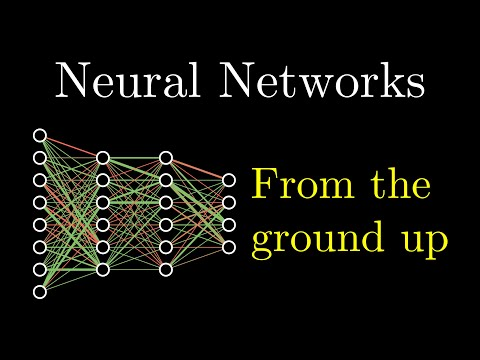

In [19]:
YouTubeVideo('aircAruvnKk', width=800, height=500)

Let wel, voor deze opdracht laten we de sigmoid functie die in de video genoemd wordt achterwege!

Elke overgang van de ene laag naar de andere laag van een neuraal netwerk wordt weergegeven met een matrix, $L_i$  welke de overgang beschrijft van laag $\text{i}$ naar laag $i+1$ in het netwerk. In het onderstaande voorbeeld hebben we 3 lagen: een input laag, één hidden layer en een output laag.

![neural network](neuralnetwork.png)

We hebben nu dus 2 overgangen, oftewel matrices $\mathbf{L_0}$ en $\mathbf{L_1}$. Stel nu dat de input van het netwerk (de waardes van laag 0) wordt gegeven door de vector $\vec{x}$, dan kan de output van het netwerk $\vec{y}$ worden gegeven door:

$$\vec{y} = \mathbf{L_1} (\mathbf{L_0} \vec{x})$$

We hebben gezien dat we de haakjes ook anders mogen zetten: door eerst de twee matrices met elkaar te vermenigvuldigen en het resultaat dan op $\vec x$ toe te passen hoeven we voor iedere nieuwe invoersvector $\vec{x_1} \dots \vec{x_n}$ nog maar één matrixvermenigvuldiging uit te voeren:

$$\vec{y} = (\mathbf{L_1} \mathbf{L_0}) \vec{x}$$

## De opdracht

Voor de eindopdracht van deze week is het de bedoeling om een functie `read_network(filename: str)` te maken die een netwerk in kan lezen vanuit een JSON-bestand (hiervoor zijn twee voorbeelden beschikbaar: `example.json` en `example-2layer.json`). De functie leest de lagen uit de JSON-file in, en maakt matrices voor de veschillende lagen. Als dit er meer dan 1 is worden de lagen onderling vast vermenigvuldigt, zodat er effectief maar een laag nodig is. Tijdens het trainen van een netwerk (wat voor ons al gedaan is) geven de extra lagen mogelijkheid om beter te trainen, maar nu we een getraind model hebben zitten extra lagen vooral in de weg.

Een tweede functie, `run_network(filename: str, input_vector: np.ndarray)` gebruikt `read_network()` en `matrix_multiplication` om de JSON-file niet alleen in te lezen, maar ook toe te passen op de gegeven `input_vector`.

In [20]:
import json

def read_network(filename: str) -> np.ndarray:
    matrix1 = []
    matrix2 = []
    with open(filename) as json_data:
        file = json.load(json_data)
    
    if filename == "example.json":
        layers = 1
    else:
        layers = 2
        
    
    for indexLayer in range (1,layers+1):
        for i in range(1, int(file["layer"+str(indexLayer)]["size_out"])+1):
            tempRow = []
            for x in range(1, int(file["layer"+str(indexLayer)]["size_in"])+1):
                try:
                    num = (file["layer"+str(indexLayer)]["weights"][str(x)][str(i)])
                    try:
                        tempRow.append(float(num))
                    except:
                        tempRow.append(int(num))

                except:
                    tempRow.append(0)
                    
            if indexLayer == 1:
                matrix1.append(tempRow)
            if indexLayer == 2:
                matrix2.append(tempRow)
    
    matrix1 = numpy.array(matrix1)
    matrix2 = numpy.array(matrix2)
    
    if layers == 1:
        return matrix1
    if layers == 2:
        return matrix_product(matrix2, matrix1)

        


    
def run_network(filename: str, input_vector: np.ndarray) -> np.ndarray:
    return matrix_product(read_network(filename),input_vector)
    


### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_read_singlelayer` | Het voorbeeld-netwerk met 1 layer wordt goed ingelezen |
| `test_read_duallayer` | Het voorbeeld-netwerk met 2 layers wordt goed ingelezen |
| `test_read_singlelayer` | Het voorbeeld-netwerk met 1 layer wordt goed uitgevoerd |
| `test_read_duallayer` | Het voorbeeld-netwerk met 2 layers wordt goed uitgevoerd |


In [21]:
test_neural_network(read_network, run_network, matrix_product)

test_read_duallayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok
test_read_singlelayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok
test_run_duallayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok
test_run_singlelayer (ac_tests.test_neural_network.<locals>.TestNeuralNetwork) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.032s

OK


# Checkpoint Alfa <a id='cp-alfa'></a>
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.

# Stelsels van Vergelijkingen

*Aerith is twee keer zo oud als Bronn. Bronn is vijf jaar jonger dan Calia. Aerith en Calia zijn samen één jaar jonger dan vijf keer de leeftijd van Bronn. Hoe oud is iedereen?*

Dit type raadsel is met een beetje wiskunde makkelijk op te lossen. Het is een voorbeeld van een stelsel van vergelijkingen, die we in wiskundige termen kunnen opschrijven:

$a = 2b$

$b+5=c$

$a+c = 5b-1$

We hebben hier te maken met drie vergelijkingen (zinnen in het raadsel) en drie onbekenden (de leeftijden van de drie personen). Als we de formules zo herschrijven dat alle onbekenden links staan, en alle onbekenden rechts krijgen we de volgende formules (ga dit voor jezelf na):

$1a -2b +0c = 0$

$0a +1b -1c = -5$

$1a -5b +1c = -1$

We kunnen hier een speciaal soort matrix van maken: een geaugmenteerde matrix.

$$\left[\begin{array}{ccc|c}
1 & -2 &  0 &  0 \\
0 &  1 & -1 & -5 \\
1 & -5 &  1 & -1 \\
\end{array}\right]$$

Deze kunnen we oplossen met Gauss-Jordan eliminatie. Eerst trekken we de eerste rij van de derde af:

$$\left[\begin{array}{ccc|c}
1 & -2 &  0 &  0 \\
0 &  1 & -1 & -5 \\
0 & -3 &  1 & -1 \\
\end{array}\right]$$

Dan tellen we drie keer de tweede rij bij de derde op:

$$\left[\begin{array}{ccc|c}
1 & -2 &  0 &   0 \\
0 &  1 & -1 &  -5 \\
0 &  0 & -2 & -16 \\
\end{array}\right]$$

Dan delen we de derde rij door min twee:

$$\left[\begin{array}{ccc|c}
1 & -2 &  0 &  0 \\
0 &  1 & -1 & -5 \\
0 &  0 &  1 &  8 \\
\end{array}\right]$$

We kunnen de derde rij nu bij de tweede optellen:

$$\left[\begin{array}{ccc|c}
1 & -2 & 0 & 0 \\
0 &  1 & 0 & 3 \\
0 &  0 & 1 & 8 \\
\end{array}\right]$$

Tot slot tellen we twee keer de tweede rij bij de eerste op:

$$\left[\begin{array}{ccc|c}
1 & 0 & 0 & 6 \\
0 & 1 & 0 & 3 \\
0 & 0 & 1 & 8 \\
\end{array}\right]$$

Terug naar vergelijkingen staat er nu:

$a = 6$

$b = 3$

$c = 8$

Dus Aerith is zes, Bronn is drie en Calia is acht. Met de hand is Gauss-Jordan eliminatie een goede manier om een stelsel van vergelijkingen op te lossen.

## Opdracht 12

Het blok hieronder genereert een willekeurige oplosbare augmented matrix voor je. Schrijf deze matrix terug naar een stelsel van vergelijkingen, en voer Gauss-Jordan eliminatie op de matrix uit. Wat zijn de waardes van de drie onbekenden $x_0$, $x_1$ en $x_2$?

In [22]:
RNG().set(4)
random_sys_of_eq()

<IPython.core.display.Math object>

<details><pre>$(\mathbf{A} | \vec b) =  \left[\begin{array}{ccc|c}   0 & 0 & 2 & -7\\   0 & 2 & 1 & -39\\   2 & 1 & 1 & -55\\ \end{array}\right]$</pre></details>

<div style="background:#fffff0;">

### Stelsel van vergelijkingen

$\dots x_0 + \dots x_1 + \dots x_2 = 0a + 0b + 2c = -7 $

$\dots x_0 + \dots x_1 + \dots x_2 = 0a + 2b + 1c = -39 $

$\dots x_0 + \dots x_1 + \dots x_2 = 2a + 1b + 1c = -55  $
    
### Gauss-Jordan eliminatie
    
$(\mathbf{A} | \vec b) = \\
\text{Wissel rij 1 en rij 3 om}
\left[\begin{array}{ccc|c}
2 & 1 &  1 &  -55\\
0 &  2 & 1 & -39 \\
0 & 0 &  2 & -7 \\
\end{array}\right]
\\
\text{Deel alle rijen door 2}
\left[\begin{array}{ccc|c}
1 & 0.5 &  0.5 &  -27.5 \\
0 &  1 & 0.5 & -19.5 \\
0 & 0 &  1 & -3.5 \\
\end{array}\right]
\\
\text{R1 = R1 - (R2 * 0.5)}
\left[\begin{array}{ccc|c}
1 & 0 &  0.25 &  -27.5 \\
0 &  1 & 0.5 & -19.5 \\
0 & 0 &  1 & -3.5 \\
\end{array}\right]
\\
\text{R1 = R1 - R3* 0.25 en R2 = R2 - R3*0.5}
\left[\begin{array}{ccc|c}
1 & 0 &  0 &  -16.875 \\
0 &  1 & 0 & -17.75 \\
0 & 0 &  1 & -3.5 \\
\end{array}\right]$\





### Resultaat

$x_0 = -16.875 $
    
$x_1 = -17.75 $
    
$x_2 = -3.5 $

</div>

## Augmented Matrices as matrix-vector vergelijkingen
De *augmented matrix* staat eigenlijk voor een matrix en een vector, in een vergelijking:

$$\begin{bmatrix}
1 & -2 &  0 \\
0 &  1 & -1 \\
1 & -5 &  1 \\
\end{bmatrix} 
\begin{bmatrix}a \\ b \\ c \end{bmatrix} =
\begin{bmatrix}0 \\ -5 \\ -1 \end{bmatrix}$$

Als we de matrix $\mathbf{A}$ noemen, de vector met de drie onbekenden $\vec x$ en de vector rechts van de streep $\vec b$ hebben we $\mathbf{A}\vec x = \vec b$. Dit geeft de indruk dat als we beide kanten door $\mathbf{A}$ we zien dat de vector die we zoeken, $\vec x$, gelijk is aan $\vec b\ /\ \mathbf{A}$. Delen van een vector door een matrix bestaat helaas niet, maar we kunnen wel iets anders doen.

### De omgekeerde
Als we even teruggaan naar getallen, en vragen om $8$ door $2$ te delen, zonder deling te gebruiken, dan kunnen we dit met een breuk oplossen:

$$8/2 = \frac{1}{2} \times 8 = 4$$

De breuk, *een half*, is hier de *omgekeerde* van twee, en andersom is twee de omgekeerde van *een half*. **Bijna** ieder getal heeft een omgekeerde. Soms is de omgekeerde het getal zelf: de omgekeerde van $1$ is $\frac{1}{1}$ is gewoon $1$. Het enige normale getal zonder omgekeerde is $0$, want dan zouden we $\frac{1}{0}$ moeten hebben en delen door $0$ kan helaas niet.

Bij matrices kan er ook sprake zijn van een omgekeerde, de *inverse matrix*, maar lang niet elke matrix heeft er een. Het feit dat het raadsel waar we mee begonnen een oplossing heeft betekent dat deze matrix er wel een moet hebben, maar in het algemeen kunnen we er niet vanuit gaan.

Als we een matrix als een transformatie zien dan is de inverse matrix de zelfde transformatie, maar dan omgekeerd. Als we de transformatie doen, en dan de omgekeerde, is het alsof er niets gebeurd is. Ook kunnen we eerst de omgekeerde doen, en dan de gewone matrix, ook dan mag er niets veranderen. Een matrix waarvoor de inverse bestaat noemen we "omkeerbaar" of in het engels "invertible".

### Niet omkeerbare matrices
Een matrix die van 2D naar 3D gaat is een voorbeeld van een matrix die niet om te keren is: door de transformatie raken we de diepte uit. Je kan van een object wel bepalen hoe de schaduw eruit moet zien, maar uit de schaduw niet het hele 3D-plaatje terughalen. Om een omgekeerde te hebben moet een matrix dus op zijn minst vierkant zijn.

Een matrix van 3D naar 2D (een $2\times 3$-matrix) heeft geen omgekeerde omdat we niet terug van 2D naar 3D kunnen. Een matrix maar van 2D naar 3D kunnen we wel ongedaan maken (een 2D-vlak in 3D blijft 2D, zoals een vel papier dat niet plat op tafel ligt maar in een ruimte zweeft), maar voor een omgekeerde moet gelden dat de volgorde niet uitmaakt: eerst de gewone matrix en dan de omgekeerde, of eerst de omgekeerde en dan de gewone matrix, in beide gevallen moet er niets gebeuren. Voor een 3D-naar-2D matrix bestaat er geen omgekeerde, dus voor een 2D-naar-3D matrix $\mathbf{M}$ is er geen 3D-naar-2D matrix te vinden die $\mathbf{M}$ als omgekeerde heeft.

### De determinant
Een manier om te bepalen of een matrix omkeerbaar is, is naar de determinant te kijken. Een matrix kan bijvoorbeeld niet omkeerbaar zijn omdat deze van 3 naar 2 dimensies projecteert. In 3D geeft de determinant de factor aan waarmee volumes (de inhoud) van vormen in de 3D ruimte geschaald worden. Met een determinant van $8$ wordt alles acht keer zo groot, dus bijvoorbeeld twee keer zo lang, twee keer zo hoog en twee keer zo diep (3Blue1Brown weet dit mooi te visualiseren). Een determinant van $0$ betekent dat alles een inhoud van $0$ krijgt, dat wil zeggen eigenlijk niet meer 3D is, en dat is bijvoorbeeld het geval als de 3D ruimte naar een 2D subruimte geprojecteerd wordt. 

Een matrix heeft alleen een determinant als deze vierkant is: als we weten dat een matrix van 3D naar 2D gaat, is het namelijk al niet meer zinvol over inhoud te spreken. Een vierkante matrix heeft wel altijd een determinant, al kan deze $0$ zijn. In dat geval wordt er bijvoorbeeld van 3D naar 2D geprojecteerd, heeft de matrix dus geen inverse, en heeft het stelsel van vergelijkingen dat bij de matrix hoort ook geen unieke oplossing.

De matrix van het raadsel waar we mee begonnen heeft een determinant die niet $0$ is (dat wisten we al, want het raadsel was op te lossen):

$$
\begin{align}
\text{det}(\mathbf{A}) &= \left|\begin{array}{ccc}
1 & -2 &  0 \\
0 &  1 & -1 \\
1 & -5 &  1 \\
\end{array}\right|
\\[3mm] & = 
1 \left|\begin{array}{cc}1 & -1 \\ -5 & 1\\ \end{array}\right| -
(-2) \left|\begin{array}{cc}0 & -1 \\ 1 & 1\\ \end{array}\right| +
0 \left|\begin{array}{cc}0 & 1 \\ 1 & -5 \\ \end{array}\right|
\\[3mm] & =
1 \left|\begin{array}{cc}1 & -1 \\ -5 & 1\\ \end{array}\right| +
2 \left|\begin{array}{cc}0 & -1 \\ 1 & 1\\ \end{array}\right| 
\\[3mm] & =
1 (1\times1 - (-1)\times (-5)) + 2 (0\times1 - (-1)\times 1)
\\[3mm] & =
1 (1 - 5) + 2 (0 + 1)
\\[3mm] & =
-2
\end{align}
$$ 

Dit lijkt misschien wat veel werk om alleen te bepalen of een matrix omkeerbaar is, maar gelukkig hebben we hiermee ook al een hoop gedaan om de omgekeerde straks te kunnen berekenen.

## Opdracht 13

Bereken voor de onderstaande vierkante matrices de determinant.

In [23]:
RNG().set(4)

random_tensor(r"\textbf{M}", (2,2), singular=matrix_nd)
random_tensor(r"\textbf{N}", (2,2), singular=matrix_gd)
random_tensor(r"\textbf{O}", (2,2), singular=matrix_nd)
random_tensor(r"\textbf{P}", (3,3), singular=matrix_nd, interval=(0,5))
random_tensor(r"\textbf{Q}", (3,3), singular=matrix_gd, interval=(0,5))

<IPython.core.display.Math object>

<details><pre>$\textbf{M} =  \begin{bmatrix}   -4 & 10\\   -18 & -18\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{N} =  \begin{bmatrix}   -5 & 0\\   1 & 0\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{O} =  \begin{bmatrix}   7 & -20\\   -11 & -4\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{P} =  \begin{bmatrix}   4 & 2 & 1\\   1 & 2 & 4\\   1 & 2 & 3\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{Q} =  \begin{bmatrix}   3 & 3 & 2\\   3 & 3 & 1\\   3 & 3 & 3\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">

### Determinanten <a id='opdr13'></a>

$\text{det}(\bf M) = -4 * -18 - 10 * -18 = 72 + 180 = 252 $

$\text{det}(\bf N) = -5 * 0 - 1 * 0 = 0 $

$\text{det}(\bf O) = 7 * -4 - -11*-20 = -28 - 220 = -248 $

$\text{det}(\bf P) = 4 * \begin{vmatrix} 2 & 4\\ 2 & 3\\ \end{vmatrix} - 2 * \begin{vmatrix} 1 & 4\\ 1 & 3\\ \end{vmatrix} + 1 * \begin{vmatrix} 1 & 2\\ 1 & 2\\ \end{vmatrix} = 4 * (2*3-2*4) - 2*(1*3-1*4) + 1 * (1*2-1*2)
 = -6 $

$\text{det}(\bf Q) = 3 * \begin{vmatrix} 3 & 1\\ 3 & 3\\ \end{vmatrix} - 3 * \begin{vmatrix} 3 & 1\\ 3 & 3\\ \end{vmatrix} + 2 * \begin{vmatrix} 3 & 3\\ 3 & 3\\ \end{vmatrix} = 3 * (3*3 - 1*3) + 3*(3*3-1*3) + 2*(3*3-3*3) = 36  $

</div>

## Opdracht 14

Schrijf twee functies om de determinant van een matrix te berekenen: een voor $2 \times 2$ en een voor $3 \times 3$. Gebruik voor de $3 \times 3$ variant de  de [Rule of Sarrus](https://en.wikipedia.org/wiki/Rule_of_Sarrus). Schrijf tot slot een functie die de juiste versie aanroept. Alle drie de functies moeten een `DimensionError` geven:
 - als de matrix niet vierkant is;
 - als de matrix niet exact $2 \times 2$ is (voor `determinant_2()`);
 - als de matrix niet exact $3 \times 3$ is (voor `determinant_3()`) en
 - als de matrix groter is dan $3 \times 3$  (voor `determinant()`).
 
**Probeer zelf met een goed antwoord te komen als een $1\times 1$ matrix wordt meegegeven. Hoeveel groter wordt iets als je het met het gegeven getal vermenigvuldigt?**

In [24]:
def determinant_2(M: np.ndarray) -> int:
    if M.shape != (2,2):
        raise DimensionError("Dit is geen 2x2 matrix")

    return (M[0][0]*M[1][1] - M[0][1]*M[1][0]) # Return linksboven keer rechtsonder min rechtsboven keer linksonder
            

def determinant_3(M: np.ndarray) -> int: # TODO
    if M.shape != (3,3):
        raise DimensionError("Dit is geen 3x3 matrix")
    
    #Bereken voor elk getal in de bovenste rij de determinant van de bijbehorende vector en vermenigvuldig dit met elkaar
    x = M[0][0] * determinant_2(numpy.array([(M[1][1],M[1][2]),(M[2][1],M[2][2])]))
    y = M[0][1] * determinant_2(numpy.array([(M[1][0],M[1][2]),(M[2][0],M[2][2])]))
    z = M[0][2] * determinant_2(numpy.array([(M[1][0],M[1][1]),(M[2][0],M[2][1])]))     
    return x - y + z 



def determinant(M: np.ndarray) -> int: # TODO
    if M.shape == (3,3):
        return determinant_3(M)
    elif M.shape == (2,2):
        return determinant_2(M)
    
    elif M.shape == ():
        return M
    
    else:
        raise DimensionError

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_determinant2_nonzero` | `determinant_2` werkt op omkeerbare $2 \times 2$ matrix (determinant is niet 0) |
| `test_determinant2_zero` | `determinant_2` werkt op onomkeerbare $2 \times 2$ matrix (determinant is 0)  |
| `test_determinant2_invalid` | `determinant_2` handelt foute invoer goed af |
| `test_determinant3_nonzero` | `determinant_3` werkt op omkeerbare $3 \times 3$ matrix (determinant is niet 0)  |
| `test_determinant3_zero` | `determinant_3` werkt op onomkeerbare $3 \times 3$ matrix (determinant is 0) |
| `test_determinant3_invalid` | `determinant_3` handelt foute invoer goed af |
| `test_determinant_scalar` | `determinant` werkt correct op $1 \times 1$ matrix |
| `test_determinant_nonzero2` | `determinant` werkt op omkeerbare $2 \times 2$ matrix (determinant is niet 0)  |
| `test_determinant_nonzero3` | `determinant` werkt op omkeerbare $3 \times 3$ matrix (determinant is niet 0)  |
| `test_determinant_zero2` | `determinant` werkt op onomkeerbare $2 \times 2$ matrix (determinant is 0) |
| `test_determinant_zero3` | `determinant` werkt op onomkeerbare $3 \times 3$ matrix (determinant is 0) |
| `test_determinant_too_large` | `determinant` handelt te grote invoer goed af |
| `test_determinant_invalid` | `determinant` handelt niet-vierkante invoer goed af |


In [25]:
test_determinant(determinant_2, determinant_3, determinant)

test_determinant2_invalid (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant2_nonzero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant2_zero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant3_invalid (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant3_nonzero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant3_zero (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_invalid (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_nonzero2 (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_nonzero3 (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_scalar (ac_tests.test_determinant.<locals>.TestDeterminant) ... ERROR
test_determinant_too_large (ac_tests.test_determinant.<locals>.TestDeterminant) ... ok
test_determinant_zero2 (ac_tests.test_determinant.<locals>.

## De Identiteitsmatrix

Na Gauss-Jordan eliminatie zag 

$$\left[\begin{array}{ccc|c}
1 & -2 &  0 &  0 \\
0 &  1 & -1 & -5 \\
1 & -5 &  1 & -1 \\
\end{array}\right]$$

er zo uit

$$\left[\begin{array}{ccc|c}
1 & 0 & 0 & 6 \\
0 & 1 & 0 & 3 \\
0 & 0 & 1 & 8 \\
\end{array}\right]$$

Geschreven als vector vergelijking zijn we van

$$\begin{bmatrix}
1 & -2 &  0 \\
0 &  1 & -1 \\
1 & -5 &  1 \\
\end{bmatrix} 
\begin{bmatrix}a \\ b \\ c \end{bmatrix} =
\begin{bmatrix}0 \\ -5 \\ -1 \end{bmatrix}$$

naar

$$\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix} 
\begin{bmatrix}a \\ b \\ c \end{bmatrix} =
\begin{bmatrix}6 \\ 3 \\ 8 \end{bmatrix}$$

gegaan.

De matrix in deze vergelijking noemen we de identiteitsmatrix $\mathbf{I}$, of specifiek in dit geval de identiteitsmatrix in drie dimensies $\mathbf{I_3}$. Een identiteitsmatrix bevat op de diagonaal alleen maar enen, en verder alleen maar nullen. Deze matrix kun je met elke 3D-vector vector vermenigvuldigen, zonder dat de vector verandert. Het is alsof we de vector met $1$ vermenigvuldigen. De transformatie die bij deze matrix hoort is dan ook de transformatie die niets doet.

$$\mathbf{I_3} = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}$$

<span style="color: red">Om de leesbaarheid in alle formules een beetje te bewaren zullen we hier de operator $\cdot$ gebruiken om twee matrices (of een matrix en een vector) te vermenigvuldigen. Dit is niet echt standaard-notatie, maar voor nu helpt het ons even.</span>

We kunnen de identiteitsmatrix ook met een andere matrix $\mathbf{M}$ vermengivuldigen (ervan uitgaande dat de dimensies kloppen), en ook dan verandert de identiteitsmatrix niets aan $\mathbf{M}$. Als $\mathbf{M}$ een $2\times 3$ matrix is kunnen we bijvoorbeeld stellen:

$$\mathbf{I_2} \cdot \mathbf{M} = \mathbf{M} \cdot \mathbf{I_3} = \mathbf{M}$$

Met deze matrix kunnen we ook de inverse duidelijker weergeven. Als we een omkeerbare $3\times 3$ matrix $\mathbf{N}$ hebben, dan is de omgekeerde daarvan $\mathbf{N}^{-1}$, en geldt dat

$$\mathbf{N} \cdot \mathbf{N}^{-1} = \mathbf{N}^{-1} \cdot \mathbf{N} = \mathbf{I_3}$$.

## Terug naar het voorbeeld
In ons voorbeeld zou het fijn zijn om door een vector te kunnen delen, maar helaas was dat niet mogelijk. We zullen dus met de inverse van de matrix aan de gang moeten gaan, en inmiddels hebben we de notatie ervoor in huis. Hieronder zien we nog een keer de matrices. Onder iedere vector en matrix staat het label dat we eraan gegeven hebben, zodat we verder met symbolen kunnen werken en niet alle matrices iedere keer uit hoeven te tekenen:

$$\underbrace{\begin{bmatrix}
1 & -2 &  0 \\
0 &  1 & -1 \\
1 & -5 &  1 \\
\end{bmatrix}\\[1cm]}_{\displaystyle\mathbf{A}}\ \ 
\underbrace{\begin{bmatrix}a \\ b \\ c \end{bmatrix}\\[1cm]}_{\displaystyle\vec x} =
\underbrace{\begin{bmatrix}0 \\ -5 \\ -1 \end{bmatrix}\\[1cm]}_{\displaystyle\vec b} 
\qquad\to\qquad
\underbrace{\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}\\[1cm]}_{\displaystyle\mathbf{I_3}}\ \
\underbrace{\begin{bmatrix}a \\ b \\ c \end{bmatrix}\\[1cm]}_{\displaystyle\vec x} =
\underbrace{\begin{bmatrix}6 \\ 3 \\ 8 \end{bmatrix}\\[1cm]}_{\displaystyle\vec x}$$

We beginnen met
$$\mathbf{A} \cdot \vec x = \vec b$$

We kunnen kunnen nu aan beide kanten van deze vergelijking de inverse links vermenigvuldigen:

$$\mathbf{A}^{-1} \cdot \mathbf{A} \cdot \vec x = \mathbf{A}^{-1} \cdot \vec b$$

Links vermenigvuldigen we de twee matrices om $\mathbf{I_3}$ te krijgen:

$$\mathbf{I_3} \cdot \vec x = \mathbf{A}^{-1} \cdot \vec b$$

De identiteitsmatrix doet niets, dus die mogen we weghalen:

$$\vec x = \mathbf{A}^{-1} \cdot \vec b$$

Dus: om $\vec x$ te vinden hoeven we alleen de inverse van $\mathbf{A}$ te berekenen, en deze te vermenigvuldigen met $\vec b$. We weten dat de matrix omkeerbaar is, dus we zijn er bijna!

## De inverse berekenen
De inverse van een matrix berekenen is met de hand best een klus. Voor een $2 \times 2$ matrix is het goed te doen, maar voor grotere matrices is het wat meer werk. Daarom doen we alleen de $2 \times 2$ met de hand. Gegeven een matrix

$$\mathbf{M} = \begin{bmatrix}a & b \\ c & d\end{bmatrix}$$

moeten we 2 dingen hebben:
 - de determinant en
 - de geadjugeerde matrix.
 
De eerste hebben we al berekend, de tweede ziet er voor twee dimensies als volgt uit:


$$\text{adj}(\mathbf{M}) = \begin{bmatrix}d & -b \\ -c & a\end{bmatrix}$$

Deze delen we door de determinant, en dan hebben we ons antwoord. Bij het delen van een matrix door een scalar (getal) delen we elk item gewoon afzonderlijk. Als de determinant nul is zouden we moeten delen door $0$, maar dat kan natuurlijk niet. Deze matrices zijn dus niet omkeerbaar.

## Opdracht 15
Bereken van de onderstaande matrices de inverse (of $\bot$ als de inverse niet bestaat). De determinant hebben we bij [opdracht 13](#opdr13) al eerder berekend.

In [26]:
RNG().set(4)

random_tensor(r"\textbf{M}", (2,2), singular=matrix_nd)
random_tensor(r"\textbf{N}", (2,2), singular=matrix_gd)
random_tensor(r"\textbf{O}", (2,2), singular=matrix_nd)

<IPython.core.display.Math object>

<details><pre>$\textbf{M} =  \begin{bmatrix}   -4 & 10\\   -18 & -18\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{N} =  \begin{bmatrix}   -5 & 0\\   1 & 0\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{O} =  \begin{bmatrix}   7 & -20\\   -11 & -4\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">

### Inversen <a id='opdr13'></a>


$\text{adj}(\textbf{M}) = \begin{bmatrix}   -18 & -10\\   18 & 4\\ \end{bmatrix} $

$\text{det}(\textbf{M}) = -4 * -18 - 10 * -18 = 72 + 180 = 252 $

$\textbf{M}^{-1} = 1/252 \begin{bmatrix}   -18 & -10\\   18 & 4\\ \end{bmatrix} = \begin{bmatrix}   -1/14 & -5/126\\   1/14 & 1/63\\ \end{bmatrix}   $

<hr />

$\text{adj}(\textbf{N}) = \begin{bmatrix} 0 & 0\\ -1 & -5\\ \end{bmatrix} $

$\text{det}(\textbf{N}) = -5 * 0 - 1 * 0 = 0 $

$\textbf{N}^{-1} = 1/0 \begin{bmatrix} 0 & 0\\ -1 & -5\\ \end{bmatrix} = ⊥  $

<hr />

$\text{adj}(\textbf{O}) = \begin{bmatrix} -4 & 20 \\ 11 & 7\\ \end{bmatrix}   $

$\text{det}(\textbf{O}) = \dots 7 * -4 - -11*-20 = -28 - 220 = -248 $

$\textbf{O}^{-1} = 1/-248 \begin{bmatrix} -4 & 20 \\ 11 & 7\\ \end{bmatrix} = \begin{bmatrix} 1/62 & -5/62 \\ -11/248 & -7/248\\ \end{bmatrix} $

</div>

## Opdracht 16 <a id='opdr16'></a>
Schrijf een functie de de inverse van een $2\times 2$ matrix berekent. Gebruik hiervoor de determinant-functie die je eerder gemaakt hebt. De functie geeft een `DimensionError` voor een vierkante matrix die niet $2\times 2$ is, en een `NonInvertibleError` voor een $2\times2$ matrix met een determinant van $0$. 

In [27]:
def inverse_matrix_2(M: np.ndarray) -> np.ndarray: # TODO
    if M.shape != (2,2):
        raise DimensionError
        
    det = determinant(M) #Neem de determinant van de originele matrix "M"
    if det == 0:
        raise NonInvertibleError
    
    #Adjugeer de matrix M
    M[0][0], M[1][1] = M[1][1], M[0][0]
    M[0][1] = -(M[0][1])
    M[1][0] = -(M[1][0])
    adj = M
    
    inv = []   
    #Deel elk getal in adj(M) door de determinant van de originele matrix "M". Voeg dit toe aan de inverse.
    for row in adj:
        inv.append((row[0]/det,row[1]/det))
    
    return inv

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_inverse2` | Functie werkt voor een inverteerbare $2\times 2$ matrix |
| `test_inverse2_invalid` | Correcte error voor een matrix met verkeerde dimensies |
| `test_inverse2_no_inverse` | Correcte error voor een niet-omkeerbare $2\times 2$ matrix |


In [28]:
test_inverse_2(inverse_matrix_2)

test_inverse2 (ac_tests.test_inverse_2.<locals>.TestInverse2) ... ok
test_inverse2_invalid (ac_tests.test_inverse_2.<locals>.TestInverse2) ... ok
test_inverse2_no_inverse (ac_tests.test_inverse_2.<locals>.TestInverse2) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


## Inverses van grotere matrices
De inverse van een grotere matrix is eigenlijk hetzeflde als voor een $2\times 2$ matrix, alleen met veel meer werk. Dat komt omdat zowel de geadjugeerde matrix (die je voor 2 dimensies zo uit kan schrijven) als de determinant (die voor 2 en 3 dimensies nog wel te overzien zijn) heel snel in complexiteit toenemen. Zodra je de geadjugeerde matrix en de determinant hebt gevonden is het grootste deel van het werk gedaan. 

Voor het berekenen van de geadjugeerde van een grote matrix hebben we ook weer twee stappen nodig: we moeten de cofactor-matrix vinden, en deze kunnen transposen. De cofactor matrix gaan we niet te diep op in, maar transposen kunnen we wel makkelijk zelf doen.

Als we een matrix $\mathbf{M}$ hebben dan is de getransposeerde matrix $\mathbf{M}^T$ te vinden door de matrix te spiegelen over de lijn van linksboven naar rechtsonder. Alles wat op deze lijn staat blijft hetzelfde, voor de rest komt een getal dat in kolom $x$, rij $y$ staat na het tranposen uit in kolom $y$, rij $x$:

$$\mathbf{M} = \begin{bmatrix}a & b & c \\ d & e & f \\ g & h & i\end{bmatrix}\qquad
\mathbf{M}^T = \begin{bmatrix}a & d & g \\ b & e & h \\ c & f & i\end{bmatrix}$$

Als we deze functies hebben kunnen we als volgt een matrix $\mathbf{M}$ inverteren:
1. Bepaal de cofactor-matrix van $\mathbf{M}$;
2. transpose deze matrix om de geadjugeerde matrix te krijgen en
3. deel elk item door de determinant van de originele $\mathbf{M}$.


## Opdracht 17
De code voor het inverteren van matrices groter dan $3\times 3$ is wat ingewikkelder, en is daarom hieronder gegeven. Daarbij is ook gelijk een nieuwe versie van de determinant toegevoegd, die ook voor meer dimensies werkt.

1. Neem de functies `sign()`, `submatrix()`, `determinant()` en `cofactor_matrix()` door en probeer te achterhalen wat de code doet. Documenteer daarna deze functies met behulp van de [docstring](https://www.datacamp.com/community/tutorials/docstrings-python#second-head) en commentaar in de code.
2. Schrijf zelf een functie `transpose()` die een matrix om de diagonaal spiegelt, en een functie `inverse_matrix()`. Zorg dat de `inverse_matrix()` functie checkt of een matrix inverteerbaar is, en anders errors oplevert op dezelfde manier als `inverse_matrix_2()` [hierboven](#opdr16).

In [29]:
def sign(x: int) -> int:
    """Als x even is wordt 1 teruggegeven, als x oneven is wordt -1 teruggegeven"""
    if x % 2 == 0:
        return 1
    else:
        return -1

def submatrix(M: np.ndarray, x: int, y: int) -> np.ndarray:
    """De submatrix is wat overblijft als de rij nummer x wordt verwijderd en de kolom nummer y """
    return np.delete(np.delete(M, x, 0), y, 1)

def determinant(M: np.ndarray) -> float:
    """Eerst word er gecheckt of de determinant wel berekend kan worden met 2 if statements
        Om de determinant te berekenen wordt voor elk getal in de bovenste rij dat getal met de 
        determinant van de bijbehorende vector berekend, dat wordt dan vermenigvuldigd met de sign
        Als alle getallen in de bovenste rij langs zijng gegaan wordt de determinant teruggegeven
        """
    if M.shape == () or M.shape == (0, 0) or M.shape == (1, 1): # Als M een 1x1 matrix is 
        return M.item()
    elif M.shape[0] != M.shape[1]:
        raise DimensionError("De matrix is niet vierkant")
    else:
        det = 0
        for y in range(M.shape[1]): 
            det += sign(y) * M[0][y] * determinant(submatrix(M, 0, y)) 
        return det

def cofactor_matrix(M: np.ndarray) -> np.ndarray:
    """De cofactor wordt gevonden door eerst van ELK element in de vector de bijbehorende subvector te zoeken
    en daarvan de determinant te berekenen, de uitkomst daarvan komt dan op te plek van het element"""
    adj = np.zeros((M.shape[0],M.shape[1]))
    for x in range(M.shape[0]):
        for y in range(M.shape[1]):
            adj[x][y] = sign(abs(x-y)) * determinant(submatrix(M, x, y))
    return adj.astype(int)

def transpose(M: np.ndarray) -> np.ndarray: # TODO
    N = np.zeros(shape=(M.shape))
    #Elke rij in matrix M wordt een kolom en andersom
    for i in range(len(M[0])):
        N[:, i] = M[i]
        
    #Return de getransposeerde matrix
    return(N)

def inverse_matrix(M: np.ndarray) -> np.ndarray: # TODO
    #Neem eerst de determinant van de originele matrix "M"
    det = determinant(M)
    #Neem dan de cofactor van matrix "M", dat wordt "C"
    C = cofactor_matrix(M)
    
    if det == 0:
        raise NonInvertibleError
    
    #Transposeer matrix "C", dat wordt "T"
    T = transpose(C)
    
    #Deel elk getal in de matrix T door de determinant
    for x in range(len(M)):
        for i in range(len(M[0])):
            T[x][i] = T[x][i] / det
    return T

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_inverse` | Functie werkt voor een inverteerbare $4\times 4$ test-matrix |
| `test_inverse_invalid` | Correcte error voor een matrix met verkeerde dimensies |
| `test_inverse_no_inverse` | Correcte error voor een niet-omkeerbare vierkante matrix |


In [30]:
test_inverse_(inverse_matrix)

test_inverse (ac_tests.test_inverse_.<locals>.TestInverse) ... ok
test_inverse_invalid (ac_tests.test_inverse_.<locals>.TestInverse) ... ok
test_inverse_no_inverse (ac_tests.test_inverse_.<locals>.TestInverse) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.021s

OK


## Onder- en overgedetermineerde systemen
Niet ieder systeem heeft een unieke oplossing zoals het raadsel hierboven. Neem bijvoorbeeld de formule $x - y = 0$. Hier zijn oneindig oplossingen voor te verzinnen: $x = y = 1$, of $x = y = 2$, etc. We noemen zo'n stelsel *underdermined*: we hebben niet genoeg informatie om een eenduidige oplossing te vinden. Als we een vergelijking toevoegen kunnen we mogelijk een oplossing vinden. Als we bijvoorbeeld ook weten dat $x = 3$, dan kunnen we concluderen dat $y=3$. 

### Ondergedetermineerde systemen

Het is ook mogelijk een vergelijking toe te voegen zonder dat het ons dichter bij een antwoord brengt. Als we $x - y = 0$ hebben, en we voegen $2x - 2y = 0$ toe, dan hebben we welliswaar net zoveel vergelijkingen als onbekenden, maar geen unieke oplossing. Twee van de vergelijkingen (in dit geval alle twee) zijn veelvouden van elkaar, of een combinatie van andere vergelijkingen die we al hadden.

Hebben we bijvoorbeeld

$x + y - z = 3$

$-y = 5$

dan hebben we wederom oneindig oplossingen: $y = -5, x = 8, z = 0$ is een oplossing, maar $y = -5, x = 9, z = 1$ ook. Als we nu $x - z = 8$ toevoegen dan valt het misschien niet meteen op, maar hebben we geen nieuwe informatie gekregen en kunnen we dus nog steeds geen unieke oplossing vinden.

### Overgedetermineerde systemen
Een underdetermined stelsel (of bijbehorende matrix) kan nog steeds interessant zijn, omdat we een hele familie van oplossingen kunnen vinden. De tegenhanger van underdermined is *overdetermined*: we hebben dan meer vergelijkingen dan onbekenden, die elkaar tegen kunnen spreken. Als we bijvoorbeeld de vergelijkingen $x=1$ en $x=2$ hebben dan is er geen waarde voor $x$ te vinden zodat alle vergelijkingen kloppen. We hebben nul oplossingen.

Het hoeft nog steeds niet zo te zijn dat we met meer vergelijkingen dan onbekenden een overdetermined systeem hebben: ook hier kunnen meerdere vergelijkingen hetzelfde vertellen en geen informatie toevoegen. De twee vergelijkingen $x=1$ en $2x=2$ hebben maar een onbekende, maar omdat de ene vergelijking uit de andere af te leiden is hebben we effectief ook maar één vergelijking waar we ons zorgen over hoeven te maken. Hoewel overgedetermineerde systemen zeker interessant kunnen zijn, zullen we voor nu focussen op een ondergedetermineerd systeem.

### Onder- en overgedetermineerde matrices
Als we de stelsels van vergelijkingen hierboven overschrijven naar matrices, dan zien we dat de vorm van een matrix dus nog niet alles zegt over het aantal oplossingen van het bijbehorende systeem van vergelijkingen. Hieronder zien we de matrix van ons eerste, ondergedetermineerde systeem van drie vergelijkingen met drie onbekenden, met daarbij de bijbehorende Gauss-Jordan eliminatie:

$$\left[\begin{array}{ccc|c} 1 & 1 & -1 & 3 \\ 0 & -1 & 0 & 5 \\ 1 & 0 & -1 & 8 \end{array}\right]$$

<details>
Tel rij 2 bij rij 1 op:

$$\left[\begin{array}{ccc|c} 1 & 0 & -1 & 8 \\ 0 & -1 & 0 & 5 \\ 1 & 0 & -1 & 8 \end{array}\right]$$

Tel rij 1 bij rij 3 op:

$$\left[\begin{array}{ccc|c} 1 & 0 & -1 & 8 \\ 0 & -1 & 0 & 5 \\ 0 & 0 & 0 & 0 \end{array}\right]$$

Doe rij 2 keer $-1$:
    
</details>

$$\left[\begin{array}{ccc|c} 1 & 0 & -1 & 8 \\ 0 & 1 & 0 & -5 \\ 0 & 0 & 0 & 0 \end{array}\right]$$

Het mag dan zo zijn dat onze matrix links van de streep vierkant is, het lukt niet om op een indentiteitsmatrix uit te komen. We kunnen aflezen dat $y$ gelijk moet zijn aan $-5$, en dat $x$ gelijk is aan $z+8$, maar $z$ zelf mag alles zijn. De onderste rij hadden we net zo goed kunnen weglaten. Maar 2 rijen doen er uiteindelijk toe, en we hebben oneindig oplossingen.

## Rank en Nullity
Een manier om dit al aan de matrix af te kunnen lezen is het bepalen van de *rank* en *nullity*. Voor een matrix $\textbf{M}$ is de *rank* het aantal dimensies van de ruimte waar vectoren na de transformatie (vermenigvuldiging met de matrix) kunnen "landen". We noemen deze ruimte de *column space* $I(\textbf{M})$, ook wel *range* of *image* genoemd (vandaar de $I$) We kunnen de column space bepalen door elke kolom van de matrix als een aparte vector te zien. Door combinaties van deze vectoren te nemen wordt een ruimte opgespannen, met (een deel van) de vectoren uit de column space als basis. Voor basis geldt dat een vector in de basis niet te maken valt met de andere basis-vectoren; in dat geval is de vector overbodig en wordt deze niet meegeteld, tot we aan de minimale set van vectoren zitten. Het aantal vectoren in de set die overblijft is de rank. Neem de matrix die we als voorbeeld hebben; we kunnen de drie kolommen van de matrix nemen als drie basisvectoren $\vec{e_0}$, $\vec{e_1}$ en $\vec{e_2}$:

$$\vec{e_0} = \begin{bmatrix}1 \\ 0 \\ 1 \end{bmatrix}, \quad \vec{e_1} = \begin{bmatrix}1 \\ -1 \\ 0 \end{bmatrix} \quad\text{en} \quad \vec{e_2} = \begin{bmatrix}-1 \\ 0 \\ -1 \end{bmatrix}$$

We zien meteen dat $\vec{e_0}$ en $\vec{e_2}$ een veelvoud van elkaar zijn en dus op dezelfde lijn liggen. We kunnen $\vec{e_2}$ dus negeren: de kolomruimte wordt opgespannen door $\vec{e_0}$ en $\vec{e_1}$ en is daarmee 2-dimensionaal. Dit betekent dat de rank van de matrix $2$ is.

De kolomruimte vormt een 2D subruimte van onze 3D ruimte. Dat betekent dat op ieder punt in de kolomruimte oneindig veel vectoren uit de originele ruimte terecht komen. Denk aan een schaduw: alle punten op lijn van de lichtbron naar een punt binnen de schaduw worden naar ditzelfde punt geprojecteerd. Alle punten die naar de nul-vector $\vec 0$ worden geprojecteerd vormen ook een subruimte, in het geval van 3D-naar-2D projectie een 1D-lijn. Dit is waar de "verloren" dimensie naartoe is gegaan: de 3D ruimte is opgesplitst in een 2D column space en een 1D ruimte die we de *nulruimte*, *null space* of *kernel* $Ker(\textbf{M})$ van de matrix noemen. Het aantal dimensies van de nulruimte noemen we de *nullity* van de matrix. In het algemeen moet de som van de rank en de nullity van een matrix gelijk zijn aan het aantal kolommen, dus voor een $m\times n$ matrix $\mathbf{M}$ geldt dat:

$$\text{Rank}(\textbf{M}) + \text{Nullity}(\textbf{M}) = n$$

We kunnen de nulruimte zelf bepalen door nog een keer de Gauss-Jordan eliminatie uit te voeren, maar nu met alleen nullen in de kolom naast de streep:

$$\left[\begin{array}{ccc|c} 1 & 1 & -1 & 0 \\ 0 & -1 & 0 & 0 \\ 1 & 0 & -1 & 0 \end{array}\right]$$

<details>

Tel rij 2 bij rij 1 op:

$$\left[\begin{array}{ccc|c} 1 & 0 & -1 & 0 \\ 0 & -1 & 0 & 0 \\ 1 & 0 & -1 & 0 \end{array}\right]$$

Tel rij 1 bij rij 3 op:

$$\left[\begin{array}{ccc|c} 1 & 0 & -1 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{array}\right]$$

Doe rij 2 keer $-1$:

</details>
    
$$\left[\begin{array}{ccc|c} 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{array}\right]$$

Als we dit omschrijven naar een normale matrix-vergelijking en de gevonden vermenigvuldiging uitvoeren dan krijgen we:

$$\begin{bmatrix} 1 & 0 & -1 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix}x \\ y \\ z\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0\end{bmatrix} \quad\to\quad \begin{bmatrix}x-z \\ y \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0\end{bmatrix}$$

Oftewel $x = z$ en $y = 0$, met $z$ als vrije variabele. Met één vrije variabele kunnen we concluderen dat onze nulruimte inderdaad 1-dimensionaal is (een lijn), wat betekent dat we een *nullity* van $1$ gevonden hebben. We kunnen de hele nulruimte met een enkele basisvector $\vec{e_0}$ uitdrukken, waarbij $x$ en $z$ gelijk zijn en $y$ nul is:

$$\vec{e_0} = \begin{bmatrix}1 \\ 0 \\ 1\end{bmatrix}$$

## Opdracht 18
Bereken de column space, null space, rank en nullity voor de random gegenereerde matrices:

In [31]:
RNG().set(6)

random_tensor(r"\textbf{M}", (2,2), singular=matrix_nd, interval=(0,5))
random_tensor(r"\textbf{N}", (2,2), singular=matrix_gd, interval=(0,5))
random_tensor(r"\textbf{O}", (3,3), singular=matrix_nd, interval=(0,5))
random_tensor(r"\textbf{P}", (3,3), singular=matrix_gd, interval=(0,5))
random_tensor(r"\textbf{Q}", (2,3), singular=matrix_ns, interval=(0,5))
random_tensor(r"\textbf{R}", (2,3), singular=matrix_ns, interval=(0,5))

<IPython.core.display.Math object>

<details><pre>$\textbf{M} =  \begin{bmatrix}   0 & 2\\   4 & 1\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{N} =  \begin{bmatrix}   0 & 0\\   4 & 0\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{O} =  \begin{bmatrix}   0 & 3 & 2\\   3 & 4 & 3\\   4 & 2 & 0\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{P} =  \begin{bmatrix}   1 & 0 & 4\\   3 & 0 & 2\\   2 & 0 & 0\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{Q} =  \begin{bmatrix}   4 & 4 & 3\\   0 & 0 & 2\\ \end{bmatrix}$</pre></details>

<IPython.core.display.Math object>

<details><pre>$\textbf{R} =  \begin{bmatrix}   2 & 2 & 0\\   0 & 4 & 4\\ \end{bmatrix}$</pre></details>

<div style="background:#fffff0;">

### Inversen <a id='opdr13'></a>
    
$\text{I}(\textbf{M}) = span(\begin{bmatrix}   0\\   4\\ \end{bmatrix},\begin{bmatrix}   2\\   1\\ \end{bmatrix}) $ 

$\text{Rank}(\textbf{M}), |M| = 0*1-2*4 = -8 . \text{determinant niet gelijk aan 0 dus } \text{Rank}(\textbf{M}) = 2 $
    
$\text{Ker}(\textbf{M}) = \left[\begin{array}{cc|c}
0 & 2 &  0\\
4 & 1 & 0 \\
\end{array}\right]
\\
\text{Deel R2 door 4} \left[\begin{array}{cc|c}
0 & 2 &  0\\
1 & 0.25 & 0 \\
\end{array}\right]
\\
\text{Deel R1 door 2 } \left[\begin{array}{cc|c}
0 & 1 &  0\\
1 & 0.25 & 0 \\
\end{array}\right]
\\
\text{Trek 1/4*R1 af van R2 } \left[\begin{array}{cc|c}
0 & 1 &  0\\
1 & 0 & 0 \\
\end{array}\right]
\\ 
\text{x = 0 en y = 0 ,dus antwoord is } span(\begin{bmatrix}   0\\   0\\ \end{bmatrix})
$

$\text{Nullity}(\textbf{M}), Rank(M) + Nullity(M) = 2 = 2 + Nullity(M) = 2,  \text{dus Nullity}(\textbf{M}) = 0  $

<hr />
    
$\text{I}(\textbf{N}) = span(\begin{bmatrix}   0\\   4\\ \end{bmatrix},\begin{bmatrix}   0\\   0\\ \end{bmatrix}) $

$\text{Rank}(\textbf{N}), |N| = 0*0-0*4 = 0 . \text{determinant gelijk aan 0 dus } \text{Rank}(\textbf{N}) = 1 $
    
$\text{Ker}(\textbf{N}) = 
\text{Ker}(\textbf{M}) = \left[\begin{array}{cc|c}
0 & 0 &  0\\
4 & 0 & 0 \\
\end{array}\right]
\textbf{Ik snap niet helemaal hoe ik deze op los, Reminder aan mezelf dat ik het ga vragen volgende keer}$

$\text{Nullity}(\textbf{N}) = Rank(N) + Nullity(N) = 2 = 1 + Nullity(N) = 2,  \text{dus Nullity}(\textbf{N}) = 1 $

<hr />
    
$\text{I}(\textbf{O}) = span(\begin{bmatrix}   0\\   3\\ 4\\ \end{bmatrix},\begin{bmatrix}   3\\   4\\ 2\\ \end{bmatrix}, \begin{bmatrix}   2\\   3\\ 0\\ \end{bmatrix} ), |O| = 0 * (4*0-3*2) - 3 * (3*0-3*4) + 2*(3*2-4*4) = 16 \text{ ,determinant niet gelijk aan 0, dus antwoord blijft hetzelfde}    $

$\text{Rank}(\textbf{O}), |O| = 0 * (4*0-3*2) - 3 * (3*0-3*4) + 2*(3*2-4*4) = 16, \text{determinant niet gelijk aan 0 dus } \text{Rank}(\textbf{O}) = 3   $
    
$\text{Ker}(\textbf{O}) = 
\left[\begin{array}{ccc|c}
0 & 3 & 2& 0\\
3 & 4 & 3& 0 \\
4 & 2 & 0& 0 \\
\end{array}\right]%TODO$ 

$\text{Nullity}(\textbf{O}) = Rank(O) + Nullity(O) = 3 = 3 + Nullity(O) = 3,  \text{dus Nullity}(\textbf{O}) = 0 $

<hr />
    
$\text{I}(\textbf{P}) = span(\begin{bmatrix}   1\\   3\\ 2\\ \end{bmatrix},\begin{bmatrix}   0\\   0\\ 0\\ \end{bmatrix}, \begin{bmatrix}   4\\   2\\ 0\\ \end{bmatrix} ) = span(\begin{bmatrix}   0\\   0\\ 0\\ \end{bmatrix})  $

$\text{Rank}(\textbf{P}), |P| = 1 * (0*0 - 2*0) - 0 *(3*0-2*2) + 4 * (3*0-2*0) = 0, \text{determinant gelijk aan 0 dus nu determinanten van submatricen berekenen}\\
\begin{vmatrix} 1&0\\ 3&0\\ \end{vmatrix} = 1*0 - 3*0 = 0\\ 
\begin{vmatrix} 0&4\\ 0&2\\ \end{vmatrix} = 0*2-4*0 = 0\\
\begin{vmatrix} 3&0\\ 2&0\\ \end{vmatrix} = 3*0-0*2 = 0\\
\begin{vmatrix} 0&2\\ 0&0\\ \end{vmatrix} = 0*0-2*0 = 0 \text{ Determinanten van alle submatrixen ook gelijk aan 0 dus}, \text{Rank}(\textbf{P}) = 1$
    
$\text{Ker}(\textbf{P}) = 
\left[\begin{array}{ccc|c}
0 & 3 & 2& 0\\
3 & 4 & 3& 0 \\
4 & 2 & 0& 0 \\
\end{array}\right]%TODO$

$\text{Nullity}(\textbf{P}) = Rank(P) + Nullity(P) = 3 = 1 + Nullity(P) = 3,  \text{dus Nullity}(\textbf{P}) = 2 $

<hr />
    
$\text{I}(\textbf{Q}) = span(\begin{bmatrix}   4\\   0\\ \end{bmatrix},\begin{bmatrix}   4\\   0\\ \end{bmatrix}, \begin{bmatrix}   3\\   2\\ \end{bmatrix} ) = span(\begin{bmatrix}   4\\   0\\ \end{bmatrix}, \begin{bmatrix}   3\\   2\\ \end{bmatrix} ) $

$\text{Rank}(\textbf{Q}) = 2 \text{, want span heeft 2 vectoren } $
    
$\text{Ker}(\textbf{Q}) = 
\left[\begin{array}{ccc|c}
4 & 4 & 3& 0\\
0 & 0 & 2& 0 \\
\end{array}\right]
\\
\text{Deel R2 door 2}
\left[\begin{array}{ccc|c}
4 & 4 & 3& 0\\
0 & 0 & 1& 0 \\
\end{array}\right]
\\
\text{Trek R2*3 af van R1}
\left[\begin{array}{ccc|c}
4 & 4 & 3& 0\\
0 & 0 & 1& 0 \\
\end{array}\right]
\text{Deel R1 door 4}
\left[\begin{array}{ccc|c}
1 & 1 & 0& 0\\
0 & 0 & 1& 0 \\
\end{array}\right]
\\
\text{z = 0, x+y = 0 stel x = 1 dan is y -1. Dit geeft} \begin{bmatrix}   1\\   -1\\ 0\\ \end{bmatrix}
$



$\text{Nullity}(\textbf{Q}) = 1 \text{, want Nullity(Q) + Rank(Q) = 3 } $

<hr />
    
$\text{I}(\textbf{R}) =  span(\begin{bmatrix}   2\\   0\\ \end{bmatrix},\begin{bmatrix}   2\\   4\\ \end{bmatrix}, \begin{bmatrix}   0\\   4\\ \end{bmatrix} ) = span(\begin{bmatrix}   2\\   0\\ \end{bmatrix}, \begin{bmatrix}   2\\   4\\ \end{bmatrix} ) $

$\text{Rank}(\textbf{R}) = 2 \text{, want span heeft 2 vectoren }$
    
$\text{Ker}(\textbf{R}) = \left[\begin{array}{ccc|c}
2 & 2 & 0& 0\\
0 & 4 & 4& 0 \\
\end{array}\right]
\\ %TODO $

$\text{Nullity}(\textbf{R}) = 1 \text{, want Nullity(R) + Rank(R) = 3 } $

</div>

## Right, Left en Pseudo inversen
Voor niet-vierkante matrices of matrices met een determinant die niet 0 is, is het zoals we gezien hebben niet mogelijk een inverse te vinden: een matrix die een andere matrix ongedaan kan maken, maar ook door diezelfde matrix ongedaan kan maken. Gelukkig is het wel altijd mogelijk een matrix te vinden die één van beiden doet:
- een matrix $\mathbf{M}$ die informatie verliest, dus naar minder dimensies gaat, is niet ongedaan te maken, maar er is wel een matrix te vinden die door $\mathbf{M}$ ongedaan wordt gemaakt en
- een matrix $\mathbf{N}$ die een ruimte in een hoger-dimensionale ruimte plaats is omkeerbaar, maar er is geen unieke matrix te vinden die door $\mathbf{N}$ ongedaan wordt gemaakt.

### Right Inverse
Voor een matrix zoals $\mathbf{M}$ betekent dit dat we een *right inverse* kunnen vinden, een matrix $\mathbf{M}^r$ zodat $\mathbf{M} \cdot \mathbf{M}^r = \mathbf{I}$. Hier kunnen we dus "delen" zoals we dat met de inverse gedaan hebben, maar alleen als de matrix rechts staat:

$$\begin{align}
\mathbf{Q}\cdot \mathbf{M} = \mathbf{P} & \to
\mathbf{Q} \cdot \mathbf{M} \cdot \mathbf{M}^r = \mathbf{P} \cdot \mathbf{M}^r 
\\ & \to
\mathbf{Q} \cdot \mathbf{I} = \mathbf{P} \cdot \mathbf{M}^r
\\ & \to
\mathbf{Q} = \mathbf{P} \cdot \mathbf{M}^r
\end{align}$$

Als de matrix waardoor we willen "delen" links staat in een vermenigvuldiging komen we niet verder...

$$\begin{align}
\mathbf{M}\cdot \mathbf{Q} = \mathbf{P} & \to
\mathbf{M} \cdot \mathbf{Q} \cdot \mathbf{M}^r = \mathbf{P} \cdot \mathbf{M}^r
\\ & \to \dots
\end{align}$$
    
### Left Inverse
Voor de matrix $\mathbf{N}$ hierboven geldt precies het omgekeerde: we kunnen een *left inverse* vinden, een matrix $\mathbf{N}^l$ zodat $\mathbf{N}^l \cdot \mathbf{N} = \mathbf{I}$. Ook deze kunnen we voor een deling gebruiken, maar nu alleen als de matrix links staat (wat ook mooi van pas komt bij een matrix-vector vermenigvuldiging):

$$\begin{align}
\mathbf{N} \cdot \vec v = \vec w & \to
\mathbf{N}^l \cdot \mathbf{N} \cdot \vec v = \mathbf{M}^l \cdot \vec w 
\\ & \to
\mathbf{I} \cdot \vec v = \mathbf{N}^l \cdot \vec w
\\ & \to
\vec v  = \mathbf{N}^l \cdot \vec w 
\end{align}$$

Als de matrix waardoor we willen "delen" rechts staat in een vermenigvuldiging komen we niet verder...

$$\begin{align}
\mathbf{Q}\cdot \mathbf{N} =  \vec w & \to
\mathbf{N}^l \cdot \mathbf{Q} \cdot \mathbf{N} = \mathbf{N}^l \cdot \vec w
\\ & \to \dots
\end{align}$$

### Pseudo-Inverse
Een matrix heeft altijd een left inverse, **of** een right inverse. Als de matrix alletwee heeft, dan moeten beiden inversen dezelfde matrix zijn en is dit een honest-to-goodness echt inverse $\mathbf{M}^{-1}$. Dit geldt alleen voor vierkante, omkeerbare matrices; de rest heeft **of** een left inverse, **of** een right inverse. In dit geval kunnen we de left en right inverse met een term aanduiden: de pseudo-inverse (notatie) $\mathbf{M}^+$. Hiervoor gelden de volgende twee eigenschappen:

$$\mathbf{M} \cdot \mathbf{M}^+ \cdot \mathbf{M} = \mathbf{M}\qquad\text{en}\qquad\mathbf{M}^+ \cdot \mathbf{M} \cdot \mathbf{M}^+ = \mathbf{M}^+$$

## Opdracht 19
Magische vierkant zijn vierkanten bestaande uit getallen waarbij de sommen van de getallen op de rijen, kolommen en diagonalen allemaal hetzelfde is, bijvoorbeeld:

$$\begin{array}{|c|c|c|}
\hline
8 & 3 & 4 \\ \hline
1 & 5 & 9 \\ \hline
6 & 7 & 2 \\ \hline
\end{array}$$

Hierbij is de som van alle rijen, kolommen en diagonalen gelijk aan 15.
Een ander voorbeeld met waarbij alleen gebruik wordt gemaakt van priemgetallen is deze (met de som gelijk aan 177):

$$\begin{array}{|c|c|c|}
\hline
101 & 5 & 71 \\ \hline
29 & 59 & 89 \\ \hline
47 & 113 & 17 \\ \hline
\end{array}$$

Natuurlijk kunnen er ook grotere vierkanten worden gemaakt, zoals het onderstaande (zeer bekende) magische vierkant:
$$\begin{array}{|c|c|c|c|}
\hline
16 & 3 & 2 & 13 \\ \hline
5 & 10 & 11 & 8 \\ \hline
9 & 6 & 7 & 12 \\ \hline
4 & 15 & 14 & 1 \\ \hline
\end{array}$$

Er zijn allerlei verschillende manier om deze vierkanten te maken, maar voor ons is het interessanter om te kijken of, en zo ja hoe, je een oplossing kan vinden gegeven een aantal waardes. Neem bijvoorbeeld het onderstaande gegeven vierkant:

$$\begin{array}{|c|c|c|}
\hline
   5 &  ~~ & ~~  \\ \hline
~~  &  ~~ &  4  \\ \hline
~~  & ~~  &  6   \\ \hline
\end{array}$$

De vraag is nu: wat zijn de getallen die in de lege vakjes moeten worden ingevuld?

### Opdracht
Om een algemeen probleem als dit op te lossen is het nodig om deze vraagstelling om te schrijven in een stelsel vergelijken. Om effectief een oplossing te kunnen construeren is het nodig om dit stelsel vergelijkingen te beschrijven in matrix-vector vorm: 

$$\mathbf{A} \vec{x} = \vec{b}$$

Daarna kan je dit stelsel vergelijkingen oplossen door middel van verschillende methodes, zoals Gauss-Jordan eliminatie en (pseudo)inverse matrices. Omdat we hier met een matrix van $8\times 9$ of zelfs $9 \times 10$ te maken hebben gaan we het handwerk met Gauss-Jordan overslaan, en vertrouwen we op de computer om dit voor ons te doen.

Schrijf een functie die, gegeven een lijst van gegeven waardes `[lb, b, rb, l, m, r, lo, o, ro]` een matrix-vector vergelijking opstelt en oplost om het magische vierkant verder in te vullen. De functie gebruikt de determinant / rank om uit te zoeken of een oplossing mogelijk is. 

Je kunt de volgende NumPy functies gebruiken (deze hebben we niet zelf geschreven, omdat om deze te berekenen meer wiskundig inzicht nodig is, en dat is lastig aan een computer uit te leggen):
 - `np.linalg.pinv()`
 - `np.linalg.matrix_rank()`

Naast het programmeren moet je ook je aanpak beschrijven, indien gebruikt met verwijzing naar geraadpleegde bronnen buiten het studiemateriaal. 

**Let op:** voor deze opdracht is het niet nodig dat de oplossing bestaat uit gehele getallen. Er mogen dus breuken of komma-getallen gebruikt worden. Je mag de aanname doen dat de som van een rij, kolom of diagonaal gelijk is aan drie keer de waarde van het middelste vakje.

<div style="background:#fffff0;">

### Toelichting aanpak magische vierkanten <a id='opdr20'></a>

$\dots %TODO $

</div>

In [32]:
# Je kan latex_msquare gebruiken om een magisch vierkant van 3 bij 3 te printen, bijvoorbeeld:
latex_msquare(np.array(((8,3,4),(1,5,9),(6,7,2))))

input = np.array(((5, 0, 0),
                  (0, 0, 4),
                  (0, 0, 6)))

def magisch_vierkant(gegeven_getallen: np.ndarray) -> np.ndarray:
    print(gegeven_getallen)

<IPython.core.display.Math object>

<details><pre>$\begin{array}{|c|c|c|}\hline   8 & 3 & 4\\\hline   1 & 5 & 9\\\hline   6 & 7 & 2\\\hline \end{array}$</pre></details>

### Tests
`test_integer`:
$$\begin{array}{|c|c|c|}\hline   0 & 3 & 4\\\hline   0 & 0 & 0\\\hline   0 & 7 & 0\\\hline \end{array} \mapsto \begin{array}{|c|c|c|}\hline   8 & 3 & 4\\\hline   1 & 5 & 9\\\hline   6 & 7 & 2\\\hline \end{array}$$

`test_rational`:
$$\begin{array}{|c|c|c|}\hline   5 & 0 & 0\\\hline   0 & 0 & 4\\\hline   0 & 0 & 6\\\hline \end{array} \mapsto
\begin{array}{|c|c|c|}\hline   5 & 5 & 6.5\\\hline   7 & 5.5 & 4\\\hline   4.5 & 6 & 6\\\hline \end{array}$$

In [33]:
test_magisch_vierkant(magisch_vierkant)

test_integer (ac_tests.test_magisch_vierkant.<locals>.TestMagischVierkant) ... ERROR
test_rational (ac_tests.test_magisch_vierkant.<locals>.TestMagischVierkant) ... 

[[0 3 4]
 [0 0 0]
 [0 7 0]]
[[5 0 0]
 [0 0 4]
 [0 0 6]]


ERROR

ERROR: test_integer (ac_tests.test_magisch_vierkant.<locals>.TestMagischVierkant)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 268, in test_integer
    np.testing.assert_almost_equal(magisch_vierkant(self.i), self.i2)
  File "/opt/conda/lib/python3.7/site-packages/numpy/testing/_private/utils.py", line 585, in assert_almost_equal
    return assert_array_almost_equal(actual, desired, decimal, err_msg)
  File "/opt/conda/lib/python3.7/site-packages/numpy/testing/_private/utils.py", line 1047, in assert_array_almost_equal
    precision=decimal)
  File "/opt/conda/lib/python3.7/site-packages/numpy/testing/_private/utils.py", line 794, in assert_array_compare
    val = comparison(x, y)
  File "/opt/conda/lib/python3.7/site-packages/numpy/testing/_private/utils.py", line 1038, in compare
    z = abs(x - y)
TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

ERROR

# Checkpoint Bravo <a id='cp-bravo'></a>
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.

# Differentiëren
Het tweede deel van deze cursus gaat over calculus: de wiskunde van verandering. Waar we (lineaire) algebra in AI vooral gebruiken om data weer te geven, houdt calculus zich bezig met de functies die op die data werken. Deze inzichten kunnen we gebruiken om te optimaliseren, bijvoorbeeld de best mogelijke waarde of de laagste kosten te vinden.

## Opdracht 20
Schrijf de onderstaande functies voor het berekenen van limieten. De functie `limit_left` berekent de limiet vanaf de linkerkant, en de functie `limit_right` vanaf de rechterkant. Beide geven `None` terug als de gevraagde limiet niet bestaat. In de functie wordt een variabele `delta` ($\delta$) bijgehouden, die aangeeft hoe ver we van de opgegeven $x$ waarde de functie proberen te benaderen. Deze variabele wordt herhaaldelijk verlaagt (door te delen door 10) totdat het verschil tussen de huidige aanroep en de vorige lager is dan de parameter `epsilon` ($\epsilon$). Als de functie er niet in slaagt om de gevraagde waarde te benaderen (het resultaat van de functie-aanroep op $x \pm\delta$ is `None`) dan mag de functie `None` teruggeven.

De functie `limit` combineert beide functies. Beiden worden geprobeerd, en als de resultaten minder dan $2\epsilon$ uit elkaar liggen dan wordt het gemiddelde als benadering genomen. Anders geeft de functie `None`.

In [34]:
def limit_left(func: Callable[[float], float], x: float, epsilon: float = 0.0001) -> Tuple[float, float]: # TODO
    delta = 1
    try:
        return func(x-epsilon)
    except:
        return None
        

def limit_right(func: Callable[[float], float], x: float, epsilon: float = 0.0001) -> Tuple[float, float]: # TODO
    delta = 1 # Hoeveel zitten we links van de gevraagde waarde?
    try:
        return func(x+epsilon)
    except:
        return None
        

def limit(func: Callable[[float], float], x: float, epsilon: float = 0.0001) -> Tuple[float, float]: # TOD
    right = limit_right(x,epsilon)
    left = limit_left(x,epsilon)
    if right == None or left == None:
        return None
        
    dif = right-left
    eps2 = epsilon*2
    '''Als het verschill tussen de limit left en right minder dan 2 epsilon uit elkaar ligt wordt 
    het gemiddelde als benadering genomen '''
    if dif<eps2 or -dif<eps2:
        return (right+left)/2


### Tests
Het blok hieronder bevat een aantal functies waarmee je je code kan testen, en die ook voor de uiteindelijke tests worden gebruikt. Voel je vrij zelf functies toe te voegen!

| **Test** | **Betekenis** |
|---:|:---|
| `test_holes` | Zoekt de limiet van een functie die op een enkel punt undefined is |
| `test_single_discontinuity` | Zoekt de limiet van een functie met een enkel discontinu punt |
| `test_left_undefined_above` | Zoekt de limiet van een functie op het punt waar deze ophoudt te bestaan (rechts) |
| `test_left_undefined_below` | Zoekt de limiet van een functie op het punt waar deze begint te bestaan (links) |
| `test_jump` | Zoekt een niet-bestaande limiet in een piecewise functie |
| `test_jump_left` | Zoekt de limiet van links in de piecewise functie |
| `test_jump_right` | Zoekt de limiet van rechts in de piecewise functie |

In [35]:
def discontinuous_function(x: float) -> float:
    if x == 72:
        return -10
    elif x % 13 == 0:
        return None
    else:
        return 2.5 * x

def holes_function(x: float) -> float:
    if x % 13 == 0:
        return None
    else:
        return 2.5 * x
    
def single_discontinuity_function(x: float) -> float:
    if x == 72:
        return -10
    else:
        return 2.5 * x
    
def right_undefined_function(x: float) -> float:
    if x >= 10:
        return None
    else:
        return x+3

def left_undefined_function(x: float) -> float:
    if x <= 10:
        return None
    else:
        return x+3

def piecewise_function(x: float) -> float:
    if x < -2:
        return -1.5*x -2
    elif x >= -2 and x <= 1:
        return -1/3 * (x-1) + 2
    else:
        return x-2
    
test_limit(limit_left, limit_right, limit)

test_holes (ac_tests.test_limit.<locals>.TestLimit) ... FAIL
test_jump (ac_tests.test_limit.<locals>.TestLimit) ... ok
test_jump_left (ac_tests.test_limit.<locals>.TestLimit) ... ok
test_jump_right (ac_tests.test_limit.<locals>.TestLimit) ... ok
test_left_undefined_above (ac_tests.test_limit.<locals>.TestLimit) ... ok
test_left_undefined_below (ac_tests.test_limit.<locals>.TestLimit) ... ok
test_single_discontinuity (ac_tests.test_limit.<locals>.TestLimit) ... FAIL

FAIL: test_holes (ac_tests.test_limit.<locals>.TestLimit)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 318, in test_holes
    np.testing.assert_equal(limit(self.holes_function,78), 195)
  File "/opt/conda/lib/python3.7/site-packages/numpy/testing/_private/utils.py", line 381, in assert_equal
    raise AssertionError(msg)
AssertionError: 
Items are not equal:
 ACTUAL: None
 DESIRED: 195

FAIL: test_single_discontinuity (

## Opdracht 21
Schrijf een functie een functie numeriek differentieert. De meegegeven functie wordt twee keer aangeroepen, eenmaal op punt `x` en een keer op `x+delta`; het verschil in `y` wordt gedeeld door het verschil in `x`.

In [36]:
def get_derivative_at(func: Callable[[float], float], x: float, delta: float = 0.0001) -> float: # TODO
    '''De helling op een punt bereken je met delta y/delta x'''
    y1 = func(x)
    y2 = func(x+delta)
    return int((y2-y1)/delta) #int, omdat de test anders niet werkt vanwege kommagetal.

### Tests
Het blok hieronder bevat een aantal functies waarmee je je code kan testen, en die ook voor de uiteindelijke tests worden gebruikt. Voel je vrij zelf functies toe te voegen!

| **Test** | **Betekenis** |
|---:|:---|
| `test_square` | Zoekt de afgeleide van `square` op $x=2$ |
| `test_double` | Zoekt de afgeleide van `double` op $x=2$ |
| `test_succ` | Zoekt de afgeleide van `succ` op $x=2$ |

In [37]:
def square(x: float) -> float:
    return x**2

def double(x: float) -> float:
    return x*2

def succ(x: float) -> float:
    return x+1
    
test_numeric_derivative(get_derivative_at)

test_double (ac_tests.test_numeric_derivative.<locals>.TestNumericDerivative) ... ok
test_square (ac_tests.test_numeric_derivative.<locals>.TestNumericDerivative) ... ok
test_succ (ac_tests.test_numeric_derivative.<locals>.TestNumericDerivative) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## Opdracht 22 <a id='opdr22'></a>
Het idee van een afgeleide wordt vooral gebruikt waneer we een functie met een formule hebben. Verderop zullen we zien hoe we van een formule de formule voor de afgeleide van een functie op elk punt kunnen berekenen. Zelfs als we geen formule maar een Python functie hebben kunnen we deze gebruiken voor het berekenen van de afgeleide: we roepen de functie aan op $x$ en $x+\delta$ en kijken wat het verschil is.

We kunnen het idee van differentiatie ook gebruiken als we helemaal geen formule hebben, maar enkel data. Als we een tabel hebben van de $x$-waarde van een functie en de bijbehorende $y$ waarde, kunnen we nog steeds zien hoeveel $y$ toeneemt (of afneemt) voor een bepaalde toename in $x$. 

Het bestand `verkeerssimulatie-rechteweg-posities.csv` bevat een voorbeeld van dit soort data. In het CSV bestand is elke kolom gescheiden door `;` en is de decimal-separator `.` en geeft de eerste rij de huidige positie van een aantal voertuigen. De rijen daarna geven in de eerste kolom de tijd, en in de volgende kolommen de snelheid van de voertuigen. Jullie doel is om de volgende gegevens te bepalen:
 - Voor elk voertuig de maximum en minimum snelheid en
 - een grafiek (in python code met matplotlib) van de snelheden van alle voertuigen over de gegeven tijdsperiode (van minimum tijdstip tot maximum tijdstip in het bestand).

Daarnaast dient er een uitleg met onderbouwing van de techniek/methode (de achterliggende wiskundige techniek) te zijn hoe je dit doet.

In [38]:
import csv
import matplotlib.pyplot as plt

def get_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    with open('verkeerssimulatie-rechteweg-posities.csv', newline='') as f:  
        reader = csv.reader(f)
        data = list(reader)
    for item in data:
        index = data.index(item)
        data[index][0] = data[index][0].split(";")
    
    tijd = []
    afstand_1 = []
    afstand_2 = []
    for item in data:
        tijd.append(float(item[0][0]))
    for item in data:
        afstand_1.append(float(item[0][1]))
    for item in data:
        afstand_2.append(float(item[0][2]))
    tijd = numpy.array(tijd)
    afstand_1 = numpy.array(afstand_1)
    afstand_2 = numpy.array(afstand_2)
    
    all_data= []
    all_data.append(tijd)
    all_data.append(afstand_1)
    all_data.append(afstand_2)
    all_data = tuple(all_data)
    return(all_data)
    
def plot_data(ys: np.ndarray, xss: List[np.ndarray]):
    '''Afstand tijds diagram. Op de y-as staat de afstand, op de x-as staat de tijd'''
    data = get_data()
    tijd = data[0]
    afstand_1 = data[1]
    afstand_2 = data[2]
    plt.plot(tijd[:10], afstand_1[:10])  # Voor grafiek auto 1
    plt.plot(tijd[:10], afstand_2[:10])  # Voor grafiek auto 2

    plt.xlabel('Tijd')
    plt.ylabel('Afstand')

    plt.legend()
    plt.show()

def bereken_deltas(times: np.ndarray, positions: np.ndarray) -> np.ndarray:
    '''Ik had het eerst per ongeluk gedaan met de data uit de csv, die code heb ik in comments gezet.'''
#     data = get_data()
#     tijd = data[0]
#     afstand_1 = data[1]
#     afstand_2 = data[2]
    
#     speeds_1 = []
#     speeds_2 = []
#     for index in range(0, 1199):
#         speeds_1.append((afstand_1[index+1]-afstand_1[index])/0.1)
#     for index in range(0, 1199):
#         speeds_2.append((afstand_2[index+1]-afstand_2[index])/0.1)
    
#     car_1_min = round(min(speeds_1),2)
#     car_1_max = round(max(speeds_1),2)
#     car_2_min = round(min(speeds_2),2)
#     car_2_max = round(max(speeds_2),2)
    
    
    speeds = []
    #Ik bereken de snelheid op elk mogelijk punt met de formule delta y/delta x = helling en in dit geval snelheid
    for index in range(0, 1199):
        speeds.append((positions[index+1]-positions[index])/0.1)
        
    return speeds


        
        

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_min_1` | De minimale waarde van de berekende snelheden klopt voor voertuig 1 |
| `test_max_1` | De maximale waarde van de berekende snelheden klopt voor voertuig 1 |
| `test_min_1` | De minimale waarde van de berekende snelheden klopt voor voertuig 2 |
| `test_max_1` | De maximale waarde van de berekende snelheden klopt voor voertuig 2 |

In [39]:
test_verkeer_snelheden(get_data, bereken_deltas)

test_max_1 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden) ... ok
test_max_2 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden) ... ok
test_min_1 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden) ... ok
test_min_2 (ac_tests.test_verkeer_snelheden.<locals>.TestVerkeerSnelheden) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.008s

OK


## Opdracht 23
Nu gaan we algebra gebruiken om afgeleides symbolisch te kunnen vinden. Voor veel wiskundige functies zijn er regels hoe je hier de afgeleide ervan kan vinden, die je kunt achterhalen met een beetje algebra en de definitief van een afgeleide als een limiet. Hierdoor hoeven we, als we de formule weten, niet voor ieder punt waar we de slope willen vinden de berekening opnieuw te doen. We berekenen een functie (die we ook de afgeleide noemen) die we vervolgens kunnen gebruiken om de afgeleide te vinden. De afgeleide van $x^2$ op het punt $x=3$ hebben we bijvoorbeeld tot nu toe zo berekend: 

$$\begin{align}
\frac{d}{dx}\  x^2 \text{ op } (x = 3) & = 
\lim_{\delta \to 0}\quad \frac{(3+\delta)^2 - 3^2}{\delta}
\\[3mm] & = 
\lim_{\delta \to 0}\quad \frac{9 + 6\delta + \delta^2 - 9}{\delta}
\\[3mm] & = 
\lim_{\delta \to 0}\quad \frac{6\delta + \delta^2}{\delta}
\\[3mm] & = 
\lim_{\delta \to 0}\quad 6 + \delta
\\[3mm] & = 
6
\end{align}
$$ 

Als we de afgeleide nu ook voor $x=4$ willen weten moeten we de hele berekening over doen. Beter kunnen we de berekening één keer voor een algemen $x$ doen en dit zo ver mogelijk versimpelen om een formule voor de afgeleide functie te vinden.

$$\begin{align}
\frac{d}{dx}\  x^2 & = 
\lim_{\delta \to 0}\quad \frac{(x+\delta)^2 - x^2}{\delta}
\\[3mm] & = 
\lim_{\delta \to 0}\quad \frac{x^2 + 2x\delta + \delta^2 - x^2}{\delta}
\\[3mm] & = 
\lim_{\delta \to 0}\quad \frac{2x\delta + \delta^2}{\delta}
\\[3mm] & = 
\lim_{\delta \to 0}\quad 2x + \delta
\\[3mm] & = 
2x
\end{align}
$$ 

Voor een functie $f(x)$ noemen we deze formule voor de afgeleide $f^\prime(x)$ (zeg: f-prime). Voor $f(x) = x^2$ hebben we hierboven berekend dat $f^\prime(x) = 2x$. Als we nu de afgeleide van $f(x)$ op $x=3$ willen weten kunnen we die invullen en krijgen we $f^\prime(3) = 2x = 6$. Eenzelfde soort formule is ook te verzinnen voor $f(x)=x^3$, $f(x)=x^4$, etc., en natuurlijk $x^1$ (oftewel $x$) en $x^0$ oftewel $1$. We kunnen deze regels combineren om polynomen (wiskundige functies van de vorm $x^2 -2x + 3$ te differentiëren. In dit voorbeeld staat $3$ voor het aantal $1$-tallen, oftewel het aantal $x^0$-tallen. 

Schrijf een functie `get_derivative` die de afgeleide van een polynoom teruggeeft. Een polynoom wordt weergegeven met een `dict` waarbij de keys de exponenten zijn en de values hoe vaak dit exponent in de polynoom voorkomt. De dictionary `{2: 3, 1: 0, 0: 4}` staat bijvoorbeeld voor de polynoom $3x^2 + 0x + 4x^0$ oftewel $3x^2 + 4$. Als een term niet voorkomt, zoals $x$ in het voorbeeld kan deze de waare $0$ hebben, of helemaal niet in de dictionary voorkomen.

De dictionary wordt samen met twee strings en een integer `primes` doorgegeven, waar je verder niet zo veel mee hoeft. De variabele `primes` begint bij een polynoom op $0$, en wordt met $1$ opgehoogd iedere keer dat de `get_derivative()` functie is aangeroepen.

Je kan een polynoom leesbaar weergeven met de functie `latex_polynomial()`.

In [40]:
def get_derivative(poly: Polynomial): # TODO
    """Bereken de derivative van een simpele polynoom. De argumenten komen binnen via een tuple.
       `label`, `var` en `primes` zijn bedoeld voor het printen van de polynoom, en niet van 
       belang voor de opdracht. Alleen `primes` moet bij differentiëren met 1 worden opgehoogd.
       Doel van de opdracht is vooral het aanpassen van `terms`.
    
    Args:
        terms (int): Een dictionary met alle coëfficienten.
        label (str): De naam van de functie, bijvoorbeeld f.
        var (str): De variabele van de functie, bijvoorbeeld x.
        primes (int): Het aantal keer dat de functie gedifferentieerd is; begint op 0
                      en wordt elke keer met 1 opgehoogd.

    Returns:
        Polynomial: (terms_derivative, label, var, primes)."""
    
    
    
    terms, label, var, primes = poly
    derivative = {}
   #Van de coefficient wordt 1 afgetrokken en de term wordt vermenigvuldigt met de (oude) coefficient
    for term in terms:
        derivative.update({term-1:terms[term]*term})
    
    return (derivative, label, var, primes + 1)

### Tests
Het blok hieronder bevat een aantal polynomen waarmee je je code kan testen, en die ook voor de uiteindelijke tests worden gebruikt. Voel je vrij zelf functies toe te voegen!

We gaan er met het testen vanuit dat je functie ook zal werken voor breuken van de vorm $\frac{1}{x^n}$ en wortels. Een breuk $\frac{1}{x^3}$ komt namelijk overeen met de term $x^{-3}$, waarvoor hetzelfde patroon als voro bijvoobeeld $x^2$ geldt. Een wortel $\sqrt x$ is te schrijven als $x^{\frac{1}{2}}$ en $\sqrt[3] x$ is $x^\frac{1}{3}$, etc., en ook hier kunnen we hetzelfde patroon gebruiken als voor normale machten.

| **Test** | **Betekenis** |
|---:|:---|
| `test_squared` | Zoekt de afgeleide van `x_squared` ($x^2$) |
| `test_recip` | Zoekt de afgeleide van `test_recip` ($\frac{1}{x}$) |
| `test_root` | Zoekt de afgeleide van `x_root` ($\sqrt x$) |
| `test_primes` | Checkt of de variabele `primes` opgehoogd is |

In [41]:
x_squared = polynomial({1: 0, 2: 1})
x_recip = polynomial({1: 0, -1: 1})
x_root = polynomial({1/2: 1})

test_polynomial_derivative(get_derivative)

test_primes (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative) ... ok
test_recip (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative) ... ok
test_root (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative) ... ok
test_squared (ac_tests.test_polynomial_derivative.<locals>.TestNumericDerivative) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.009s

OK


## Opdracht 24
Differentieren van polynomen kan ook eenvoudig in termen van lineaire algebra. Je kunt een vector $\begin{bmatrix}1\\2\\3\end{bmatrix}$ zien als een weergave van de polynoom $1 + 2x + 3x^2$. Daarbij is het ook mogelijk om een matrix te vinden die de derivative berekent. Bijvoorbeeld:

$$\vec{p} = \begin{bmatrix} 1\\ 2\\ \end{bmatrix} \qquad \mathbf{D_2} = \begin{bmatrix} 0 & 1\\ 0 & 0\\ \end{bmatrix} \qquad \mathbf{D_2}\cdot \vec{p} = \begin{bmatrix} 2\\ 0\\ \end{bmatrix}$$

$$p(x) = 2x + 1\qquad\qquad\qquad\qquad p^\prime(x) = 2$$

Deze matrix volgt een speciaal patroon: de getallen gaan van links naar rechts (en boven naar beneden) van groot naar klein. De eerste kolom/rij gaat over $1$-tallen, dan $x$-tallen, dan $x^2$-tallen, etc., waarbij de kolom waarin een getal staat vertelt welke termen in het in het orgineel met de factor vermenigvuldigt moeten worden, om de termen in de afgeleide te vinden waar de rij voor staat.

De $1$ rechtsbovenin vertelt dat het $x$-tal van het origineel (want: 2e kolom) vermenigvuldigt wordt met met $1$, en dat het resultaat het $1$-tal van de afgeleide is (want: 1e rij). Verder staan er overal nullen, dus de andere factoren worden niet meegenomen. Bedenk hoe een grotere matrix eruit moet zien, voor grotere polynomen.

Teken in het gele vlak hieronder de afgeleide-matrices voor een 3, 4 en 5-dimensionale vectoren, dus voor polynomen van de vormen $ax^2+bx+c$ tot $ax^4+bx^3+cx^2+dx+e$. Schrijf daarna een functie die deze, gegeven een vector, de juiste matrix opbouwt en deze vermenigvuldigt met de vector; het resultaat is daarmee de afgeleide van de input, in vector vorm.

<div style="background:#fffff0;">

$\mathbf{D_3}, \text{Stel } \vec{p} = \begin{bmatrix} 1\\ 2\\ 3\\ \end{bmatrix} \text{ dan }D3 * \vec{p} = \begin{bmatrix} 2\\ 6\\ 0\\ \end{bmatrix}, \text{ Dan moet } \mathbf{D_3}= \begin{bmatrix} 0 & 1 & 0\\ 0 & 0 & 2\\ 0 & 0 & 0\\ \end{bmatrix} $

$\mathbf{D_4} = \text{Stel } \vec{p} = \begin{bmatrix} 1\\ 2\\ 3\\ 4\\ \end{bmatrix} \text{ dan }D4 * \vec{p} = \begin{bmatrix} 2\\ 6\\ 12\\ 0\\ \end{bmatrix}, \text{ Dan moet } \mathbf{D_4}= \begin{bmatrix} 0 & 1 & 0 & 0\\ 0 & 0 & 2 & 0\\ 0 & 0 & 0 & 3\\ 0 & 0 & 0 & 0\\ \end{bmatrix}  $
    
$\mathbf{D_5} = \text{Stel } \vec{p} = \begin{bmatrix} 1\\ 2\\ 3\\ 4\\ 5\\ \end{bmatrix} \text{ dan }D5 * \vec{p} = \begin{bmatrix} 2\\ 6\\ 12\\ 20\\ 0\\ \end{bmatrix}, \text{ Dan moet } \mathbf{D_5}= \begin{bmatrix} 0 & 1 & 0 & 0 & 0\\ 0 & 0 & 2 & 0 & 0\\ 0 & 0 & 0 & 3 & 0\\ 0 & 0 & 0 & 0 & 4\\  0 & 0 & 0 & 0 & 0\\\end{bmatrix} $

</div>

In [42]:
def deriv_matrix(polynomial: np.ndarray) -> np.ndarray: # TODO
    matrix = []
    rows = len(polynomial)
    for index in range(0, len(polynomial)):
        if index == 0:
            continue
        else:
            matrix.append(index*polynomial[index])
            
        # Laatste element in de rij is altijd 0
        if index == rows-1:
            matrix.append(0)
            
            
    return(np.array(matrix))

### Tests
Voor deze functie is er een enkele test, die voor $3x^2 + x + 2$ de matrix test.

In [43]:
test_matrix_derivative(deriv_matrix, matrix_product)

test_derivative (ac_tests.test_matrix_derivative.<locals>.TestMatrixDerivative) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## Opdracht 25 <a id="opdr25"></a>
Nu gaan we echt serieus aan de gang met symbolisch differentiëren. We gaan dit doen op basis van code die ons in staat stelt om wiskundige formules symbolisch weer te geven en te manipuleren. Hiervoor wordt gebruikt gemaakt van Object Oriented Programming. Dit gaat in Python net weer even anders dan in normale OOP-programmeertalen, maar als het goed is heb je hier weinig last van. We gaan vooral per class een methode `deriv()` invullen, waarbij we gebruik kunnen maken van variabelen die in het object zijn opgeslagen. De Python manier hiervoor is `self.variabele` te gebruiken, of `self.functie()` om een methode binnen het object aan te roepen. 

Voor nu gaan we bezig met de volgende objecten:

- `Constant(3)` maakt een constante
- `Variable(x)` maakt een variabele
- `Sum(left, right)` maakt een som, dus `Sum(Variable(x), Constant(1)` staat voor $x+1$
- `Product(left, right)` maakt een product
- `Power(base, exponent)`, `Power(Variable(x), 3)` staat voor $x^3$. Hier is geen `Constant` nodig, power werkt alleen met getallen in het exponent.

In ieder object is een aantal variabelen beschikbaar, dit wordt per class in de docstring gedocumenteerd. Vergeet niet `self` te gebruiken, dus `self.left` om bijvoorbeeld linkerkant van een product te krijgen. Ook kan je de methodes `deriv()` op subobjecten aanroepen (recursie!) en de functie `simplify()` gebruiken. Deze functie is al geschreven voor ieder object, en probeert de constructie zo simpel mogelijk te houden, bijvoorbeeld door $1 \times 1$ te vervangen door $1$ en $x \times x$ door $x^2$. Het is verstandig na `deriv()` `.simplify()` aan te roepen. 

Negeer verder  de hele `def __init__(...)` handel, dit is helaas nodig omdat Python niet zo mooi objectgeorrienteerd is als Java/C#/C++, maar hier hoeven jullie niets mee. Deze 2 regels code per object zorgen ervoor dat alle andere code die in het object zit hier niet de boel ononverzichtelijk maken. Als je wilt weten hoe de objecten verder opgebouwd zijn kun je in het bestand `ac_formula.py` (ca 500 regels code) kijken.

## De opdracht
Vul de `deriv` functies in voor onderstaande functies. Voor `Constant` en `Sum` zijn deze al voorgedaan.
Je hoeft voor nu nog geen rekening te houden met de power rule bij de exponenten.

In [44]:
class Constant(ac_formula.Constant):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # VOORBEELD
        """ Beschikbare instance-variablen:
            - value (getal)
            """
        return Constant(0)

class Variable(ac_formula.Variable):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - label (string)
            """
        return Constant(1)

class Sum(ac_formula.Sum):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # VOORBEELD
        """ Beschikbare instance-variablen:
            - left (subformule)
            - right (subformule)
            """
        return Sum(self.left.deriv(), self.right.deriv())

class Product(ac_formula.Product):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - left (subformule)
            - right (subformule)
            """
        
        return Sum(self.left, self.right)
        
    
class Power(ac_formula.Power):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - base (subformule)
            - exponent (getal)
            """


        return Product(Power((self.base), self.exponent -1), Constant(self.exponent))
    
       # return Power(Product(self.base, Constant(self.exponent)), (self.exponent-1))

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_variable` | Zoekt de afgeleide van $x$, test `Variable` |
| `test_product` | Zoekt de afgeleide van $x_1 \cdot x_2$, test `Product` |
| `test_recip_x` | Zoekt de afgeleide van $x^{-1}$, test `Power` |
| `test_2x_plus_3` | Zoekt de afgeleide van $2x+3$, combineert alles |

In [45]:
test_symbolic_differentiation_alfa(Constant, Variable, Sum, Product, Power)

test_2x_plus_3 (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa) ... FAIL
test_product (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa) ... ok
test_recip_x (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa) ... FAIL
test_variable (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa) ... ok

FAIL: test_2x_plus_3 (ac_tests.test_symbolic_differentiation_alfa.<locals>.TestSymbolicDifferentiationAlfa)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 416, in test_2x_plus_3
    np.testing.assert_equal(form.deriv(), deriv, deriv_message(form, deriv))
  File "/opt/conda/lib/python3.7/site-packages/numpy/testing/_private/utils.py", line 428, in assert_equal
    raise AssertionError(msg)
AssertionError: 
Items are not equal:
Differentiating Function(label

## Opdracht 26

We gaan onze toolbox verder uitbreiden met een aantal goniometrische functies: $\text{sin}$, $\text{cos}$ en $\text{tan}$. Je kan waar nodig het object `Negative` gebruiken om iets negatief te maken; dit geldt ook voor constanten, je kan beter `Negative(Constant(2))` gebruiken dan `Constant(-2)`, omdat het systeem beter in staat is formules op die manier te versimpelen. `Negative` heeft een enkele variabele, `inverse`. De chain-rule / kettingregel laten we nog even achterwege, dit komt in een latere opdracht.

In [46]:
class Sin(ac_formula.Sin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - argument (subformule)
            """
        # Afgeleide van Sinus is Cosinus
        return Cos(Variable('x'))
    
class Tan(ac_formula.Tan):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - argument (subformule)
            """
        # Afgeleide van Tanges is sec^2(x)
        return Power(Sec(Variable('x')), 2)

class Cos(ac_formula.Cos):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - argument (subformule)
            """
        # Afgeleide van Cosinus is -Sinus
        return (Negative(Sin(Variable('x'))))

### Tests
| **Test** | **Betekenis** |
|---:|:---|
| `test_sin` | Zoekt de afgeleide van $\text{sin}(x)$ |
| `test_cos` | Zoekt de afgeleide van $\text{cos}(x)$ |
| `test_tan` | Zoekt de afgeleide van $\text{tan}(x)$ |

In [47]:
test_symbolic_differentiation_bravo(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan)

test_cos (ac_tests.test_symbolic_differentiation_bravo.<locals>.TestSymbolicDifferentiationBravo) ... ok
test_sin (ac_tests.test_symbolic_differentiation_bravo.<locals>.TestSymbolicDifferentiationBravo) ... ok
test_tan (ac_tests.test_symbolic_differentiation_bravo.<locals>.TestSymbolicDifferentiationBravo) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## Opdracht 27
De laatste objecten die we willen toevoegen zijn exponenten en logaritmen. `Exponent` en `Log` krijgen een `base` mee, `E` en `Ln` hebben geen base nodig, dit is namelijk het getal $e \approx 2.71828$. Voor `E` en `Ln` gelden speciale regels met afleiden, vandaar dat deze eigen objecten hebben.

Exponent is als `Power`, maar hier is het exponent een subformule in plaats van een enkel getal. $x^2$ kan dus `Power(Variable('x'), 2)` of `Exponent(Variable('x'), Constant(2))` zijn. $2^x$ is alleen met `Exponent(Constant(2), Variable('x'))` uit te drukken. De chain-rule / kettingregel laten we nog even achterwege, dit komt in de volgende opdracht.

In [48]:
class E(ac_formula.E):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - exponent (subformule)
            """
        # De afgeleide van e^x blijft hetzelfde, dit is een speciaal geval.
        return self
    
class Exponent(ac_formula.Exponent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - base (subformule)
            - exponent (subformule)
            """
        #Alleen de test "test_exponent_equivalent" werkt niet. Deze zou alleen de base moeten returnen.
        if self.exponent == 1:
            return (Constant(self.base))
        else:
            return (Power(base=(self.base*self.exponent),exponent=(self.exponent-1)))
    
class Ln(ac_formula.Ln):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - argument (subformule)
            """
        # F(x) = ln(x) dan is f'(x)= 1/x
        # Je kan geen breuken maken met de methodes in python dus x^-1 ipv 1/x.
        return Power(base=self.argument,exponent=-1)
class Log(ac_formula.Log):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        """ Beschikbare instance-variablen:
            - base (subformule)
            - argument (subformule)
            """
        #f(x) = loga(x) wordt f'(x) = (x*ln(a))^-1
        return Power(base=Product(left=self.argument,right=Ln(argument=self.base)),exponent=-1)

### Tests

Nu we langzaam bij gecompliceerdere functies aankomen kan het soms zijn dat een test faalt, terwijl het antwoord goed is. Het systeem doet z'n uiterste best formules te herschrijven zodat dit niet gebeurt, maar soms zal je ergens misschien net iets andersom hebben staan ($x+y$ in plaats van $y+x$) en rekent de test je werk fout. Soms is dit dus op te lossen door ergens je argumenten om te draaien, maar belangrijker nog: **kijk zelf of je antwoord klopt met je verwachting, of met bijvoorbeeld [Wolfram Alpha](https://www.wolframalpha.com). Je antwoord kan goed zijn zonder dat de test dit kan herkennen!** Bij twijfel: vraag je docent.

| **Test** | **Betekenis** |
|---:|:---|
| `test_exponent` | Zoekt de afgeleide van $a^x$, met $a$ als constante |
| `test_log` | Zoekt de afgeleide van $\text{log}_a(x)$, met $a$ als constante |
| `test_e` | Zoekt de afgeleide van $e^x$ |
| `test_ln` | Zoekt de afgeleide van $\text{ln}(x)$ |

Om een indicatie te geven of een afgekeurd antwoord toch goed is, is voor elke test een tweede variant beschikbaar, met het achtervoegsel `_equivalent`. Deze test niet of dezelfde formule wordt teruggegeven, maar probeert de formule uit en vergelijkt deze met het verwachte antwoord. Een `ok` hier is geen garantie dat je oplossing helemaal klopt, maar is wel een redelijke indicatie. 

In [49]:
test_symbolic_differentiation_charlie(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)
test_symbolic_differentiation_charlie_eq(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)

test_e (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie) ... ok
test_exponent (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie) ... ERROR
test_ln (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie) ... ok
test_log (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie) ... ok

ERROR: test_exponent (ac_tests.test_symbolic_differentiation_charlie.<locals>.TestSymbolicDifferentiationCharlie)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 450, in test_exponent
    np.testing.assert_equal(form.deriv(), deriv, deriv_message(form, deriv))
  File "/home/jovyan/work/ac_formula.py", line 42, in deriv
    if self.body.deriv():
  File "<ipython-input-48-5c594dc012b0>", line 25, in deriv
    return (Power(base=(self.base*self.exponent)

## Opdracht 28
Tot slot gaan we `Power`, `Sin`, `Cos`, `Tan`, `E`, `Exponent`, `Ln` en `Log` aanpassen om rekening te houden met de chain rule. De buitenste functie wordt gedifferentieerd met betrekking to de binnenste functie, en het geheel wordt vermenigvuldigd met de afgeleide van de binnenste functie. Bijvoorbeeld $\text{sin}^2x$ (een fancy manier van schrijven voor $\sin(x)^2$:

Voorheen (fout):
$f^{}(x) =\text{sin}^{2}x, \quad f^{\prime}(x) =2 \  \text{sin}(x)$

Nu (goed):
$f^{\prime}(x) =2 \  \text{cos}(x) \  \text{sin}(x)$

In [50]:
class Power(ac_formula.Power):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        pass


class Sin(ac_formula.Sin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        print(self)
        return Product(Product(Variable(2), Cos()), Sin())
    
class Tan(ac_formula.Tan):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        pass

class Cos(ac_formula.Cos):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        pass

class E(ac_formula.E):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        
        deriv_exponent = Power(Product((self.exponent).exponent, ((self.exponent).base)), (self.exponent).exponent-1)
        
        return Product(deriv_exponent, self)

    
class Exponent(ac_formula.Exponent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        pass
    
class Ln(ac_formula.Ln):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        pass
    
class Log(ac_formula.Log):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def deriv(self): # TODO
        pass

### Tests

Ook hier geldt dat het soms kan zijn dat een test faalt, terwijl het antwoord goed is. Het systeem doet z'n uiterste best formules te herschrijven zodat dit niet gebeurt, maar soms zal je ergens misschien net iets andersom hebben staan ($x+y$ in plaats van $y+x$) en rekent de test je werk fout. Soms is dit dus op te lossen door ergens je argumenten om te draaien, maar belangrijker nog: **kijk zelf of je antwoord klopt met je verwachting, of met bijvoorbeeld [Wolfram Alpha](https://www.wolframalpha.com). Je antwoord kan goed zijn zonder dat de test dit kan herkennen!** Bij twijfel: vraag je docent.

### `test_sin_squared_x`
$$f^{}(x) =\text{sin}^{2}x \mapsto f^{\prime}(x) =2 \  \text{cos}(x) \  \text{sin}(x)$$

### `test_e_x_squared`
$$f^{}(x) =e^{x^{2}} \mapsto f^{\prime}(x) =2x \  e^{x^{2}}$$

### `test_five_to_the_e_x`
$$f^{}(x) =5^{e^{x}} \mapsto f^{\prime}(x) =e^{x} \  5^{e^{x}} \  \text{ln}(5)$$

### `test_ln_x_squared`
$$f^{}(x) =\text{ln}(x^{2}) \mapsto f^{\prime}(x) =\frac{2}{x}$$

### `test_five_log_e_x`
$$f^{}(x) =\text{log}_{5}(e^{x}) \mapsto f^{\prime} =\frac{1}{\text{ln}(5)}$$

Om een indicatie te geven of een afgekeurd antwoord toch goed is, is voor elke test een tweede variant beschikbaar, met het achtervoegsel `_equivalent`. Deze test niet of dezelfde formule wordt teruggegeven, maar probeert de formule uit en vergelijkt deze met het verwachte antwoord. Een `ok` hier is geen garantie dat je oplossing helemaal klopt, maar is wel een redelijke indicatie. 

In [51]:
test_symbolic_differentiation_delta(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)
test_symbolic_differentiation_delta_eq(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)

test_e_x_squared (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta) ... ERROR
test_five_log_e_x (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta) ... FAIL
test_five_to_the_e_x (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta) ... FAIL
test_ln_x_squared (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta) ... FAIL
test_sin_squared_x (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta) ... FAIL

ERROR: test_e_x_squared (ac_tests.test_symbolic_differentiation_delta.<locals>.TestSymbolicDifferentiationDelta)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 483, in test_e_x_squared
    np.testing.assert_equal(form.deriv(), deriv, deriv_message(form, deriv))
  File "/home/jovyan/work/ac_formula.py", line 43

## Opdracht 29

Hieronder zie je de code voor een lineair regressie probleem. Op basis van een erg beperkte dataset willen we aan de hand van de kaas-consumptie per persoon (in pond) bepalen hoeveel mensen er overlijden aan het verstrikt raken in hun bedlakens [[bron](http://tylervigen.com/spurious-correlations)]. Veel van de code heeft te meer met statistiek te maken dan met calculus, dus die laten we even liggen, maar dit voorbeeld laat wel zien waarom calculus (in dit geval specifiek differentiëren) belangrijk is.

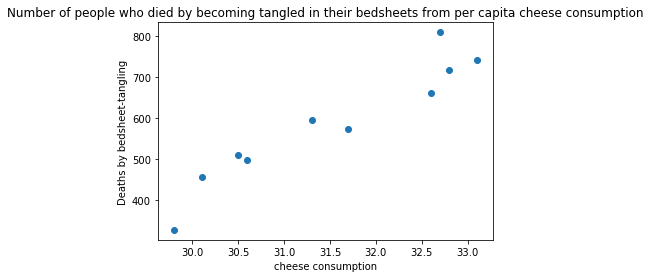

In [52]:
data = {29.8: 327, 30.1: 456, 30.5: 509, 30.6: 497, 31.3: 596,  # x: Per capita cheese consumption
        31.7: 573, 32.6: 661, 33.1: 741, 32.7: 809, 32.8: 717}  # y: Number of people who died by becoming tangled in their bedsheets

plot_data29(data)

We doen voorspellingen op basis van de aanname dat we een rechte lijn in de data kunnen trekken die redelijk dicht bij alle datapunten in de buurt zal komen. Deze rechte lijn kunnen we uitdrukken als $sx+i$. De variabele $s$ staat voor de slope: deze bepaal de richting die de lijn opgaat. Een lijn met slope 0 is plat, en hoe hoger de slope hoe sneller de lijn stijgt (en hoe lager, hoe sneller de lijn daalt). De variabele $i$ staat voor intercept, het punt waarop de lijn de $y$-as raakt (intercept betekent onderscheppen).

We kunnen bepalen hoe goed onze voorspelling werkt door voor elk datapunt de fout te berekenen, hier het kwadraat van de nemen (we willen dat de fout altijd positief is, zodat onderschatten en overschatten elkaar niet teniet doen; denk terug aan het statistiek-gedeelte van ASK). Van al deze gekwadrateerde fouten nemen we het gemiddelde.

We willen deze functie minimaliseren, want hoe kleiner de totale fout, hoe beter onze voorspelling. We hebben te maken met twee waardes die we willen optimaliseren, de slope en de intercept. Voor dit subprobleem kunnen we calculus gebruiken. Als we de afgeleide van onze kosten-functie hebben dan weten we of de fout groter of kleiner wordt als we de variabelen aanpassen. Aan jullie de taak de twee variabelen te differntiëren!

Het differentiëren van een functie met twee variabelen hebben we nog niet gezien (dat gaat later zeker terugkomen), maar gelukkig is dit niet zo moeilijk. We maken twee afgeleides: eentje waarbij we ervan uitgaan dat de slope $s$ constant is en we alleen maar naar de intercept $i$ kijken (dus waar we normaal $x$ hebben, hebben we nu $i$), en eentje waarbij we juist alleen naar de intercept kijken en de slope als constante beschouwen.

De formule die we gaan differentiëren ziet er als volgt uit:

$$J(s,i) = \frac{1}{N} \sum_{j=0}^N(y_j - (sx_j+i))^2$$

De som $\Sigma$ hebben we nog geen afgeleide van gezien, dus die verklappen we vast: dit is herhaaldelijk optellen, en de afgeleide van formule1 + formule2 is van beide de afgeleide nemen en die bij elkaar optellen. Het delen is vermenigvuldigen met een constante, dus die mogen we ook wegdenken en op het einde toevoegen.

$$J(s,i) = y - (sx+i)^2$$

Deze moeten we dus twee keer differentiëren, een keer met betrekking tot $s$ (dan zijn $i$, $y$ en $x$ constanten), en een keer met betrekking tot $i$ (dan zijn $i$, $y$ en $x$ constanten). Hint: je zult de ketting-regel / chain rule moeten gebruiken om met de functie binnen het exponent te dealen.

Bereken de beide afgeleides, en vul in de code hieronder de twee variabelen `d_cost_wrt_slope` en `d_cost_wrt_intercept` in met de formules die je gevonden hebt. Je kunt `x`, `y` en de functie `error` gebruiken om je afgeleide in uit te drukken.

In [54]:
def cost(data, slope, intercept):
    def predict(x):
        return x * slope + intercept

    def error(x, y):
        return predict(x) - y
    
    total_error = 0
    for x, y in data.items():
        total_error += error(x, y) ** 2
    return total_error / len(data)

def gradient(data, slope, intercept):
    learn_rate_slope = 0.0005
    learn_rate_intercept = 0.05
    
    def predict(x):
        return x * slope + intercept

    def error(x, y):
        return predict(x) - y
    
    total_grad_wrt_slope = 0
    total_grad_wrt_intercept = 0
    for x, y in data.items():
        
        d_cost_wrt_slope = None            # TODO
        d_cost_wrt_intercept = None        # TODO
        
        total_grad_wrt_slope += d_cost_wrt_slope * learn_rate_slope
        total_grad_wrt_intercept += d_cost_wrt_intercept * learn_rate_intercept
    return total_grad_wrt_slope / len(data), total_grad_wrt_intercept / len(data)

def train(data):
        guess_slope += update_slope
        guess_intercept += update_intercept

    count = 0
    previous = 0
    
    new = cost(data, guess_slope, guess_intercept)
    
    while abs(previous - new) > 0.01 and count < 10000:
        count += 1
        previous = new
        update_slope, update_intercept = gradient(data, guess_slope, guess_intercept)
        guess_slope -= update_slope
        guess_intercept -= update_intercept
        new = cost(data, guess_slope, guess_intercept)
        
    return guess_slope, guess_intercept

s, i = train(data)
plot_data29(data, s, i)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 38)

### Tests
De test voor deze opdracht kijkt of je model goed genoeg getraind is, d.w.z. de lijn redelijk door de punten loopt en de totale `cost` minder is dan 3200. Als je de juiste afgeleides in hebt gevuld en verder niets hebt veranderd zou je op ongeveer 3047 uit moeten komen.

In [ ]:
test_regressie(train, gradient, cost, data)

## Opdracht 30

In de cel hieronder worden een paar sommen gegenereerd met betrekking tot afgeleides. Maak deze in de gele cel daaronder, en laat zien hoe je op je antwoord gekomen bent.

In [ ]:
RNG().set(0)
random_derivatives()

<div style="background:#fffff0;">
    
**(a)** $f^\prime(x) = -4*(3-4x)^4*5 = -20(3-4x)^4$

<hr />
    
**(b)** $g^\prime(x) = 5x^4 * tan(4x^2) + x^5* \frac{1}{cos^2(4x^2)}*8x = 5x^4 * tan(4x^2)+ \frac{8x^6}{cos^2(4x^2)} $

<hr />
    
**(c)** $h^\prime(x) = (1-9x^2)*\frac{1}{(1x-3x^3)*ln(2)}$

<hr />
    
**(d)** $k^{\prime\prime}(x), k(x) =  6x^{-4}, k'(x) = -24x^{-5} , k''(x) = -120x^{-6} = -\frac{120}{x^6}    $

<hr />
    
**(e)** $\frac{d^2y}{dx^2} = \dots$

<hr />
   
**(f)** $\frac{dy}{dx}
\\
\frac{d}{dx}(5x^3y - 5x^2 + 5y^4) = \frac{d}{dx}(4)
\\ 
15x^2y - 10x + 20y^3(\frac{dy}{dx}) = 0
\\
20y^3(\frac{dy}{dx}) = 15x^2y - 10x
\\
\frac{dy}{dx} = \frac{15x^2y - 10x}{20y^3}$






</div>

# Checkpoint Charlie  <a id='cp-charlie'></a>
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.

# Integreren
Waar we bij de afgeleide de mate van verandering zoeken bij data of een formule (bijvoorbeeld de snelheid als we de positie weten), zijn we bij integreren juist op zoek naar een totaal dat opgebouwd wordt. Als we bijvoorbeeld de snelheid van een voertuig weten, dan kunnen we de afgelegde afstand ook bepalen. Dat kan heel grof (een auto die een uur lang exact 80 heeft gereden is 80 kilometer opgeschoten) maar meestal is de data niet zo overzichtelijk. De auto begon in stilstand, en tijdens het optrekken is de snelheid constant veranderd. Op een gegeven moment reed de auto misschien langere tijd 80 op een provinciale weg, maar ook dan is de snelheid nooit echt constant. Alleen als we op ieder gegeven moment de snelheid weten kunnen we de totale afstand echt zeker weten.

## Opdracht 31
Deze opdracht heeft te maken met [opdracht 22](#opdr22), en is eigenlijk een soort tegenovergesteld op dezelfde manier dat integreren de tegenovergestelde operatie van differentiëren is. 

Als we een formule hebben die die snelheid bepaalt, en de formule is continu, dan is het mogelijk tot exacte antwoorden te komen (en hier zullen we later meer van zien). Voor nu hebben we echter weer een CSV-bestand `verkeerssimulatie-rechteweg-snelheden.csv` met data, met een nauwkeurigheid van 0.1 seconde. Het betand is in hetzelfde formaat als bij opdracht 22, maar nu hebben we drie kolommen voor drie voertuigen die op dezelfde rechte weg rijden. We gaan ervan uit dat tussen de meetpunten de snelheid lineair toeneemt en dat een voertuig een lengte van 2 meter heeft.

Jullie doel voor deze opdracht is om de volgende gegevens te bepalen:
 - Het tijdstip van de eerste botsing en welke voertuigen dit zijn en
 - een grafiek (met behulp van [matplotlib](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)) van de posities van de voertuigen over de gegeven tijdsperiode (van minimum tijdstip tot maximum tijdstip in het bestand) en ingezoomd rond de eerste botsing.
 
Daarnaast dient er een uitleg met onderbouwing van de techniek/methode (de achterliggende wiskundige techniek) te zijn hoe je dit doet.

In [ ]:
import csv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

def get_data():  # TODO
    with open('verkeerssimulatie-rechteweg-snelheden.csv', newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    for item in data:
        index = data.index(item)
        data[index][0] = data[index][0].split(";")

    tijd = []
    snelheid_1 = []
    snelheid_2 = []
    snelheid_3 = []
    for item in data:
        tijd.append(float(item[0][0]))
    for item in data:
        snelheid_1.append(float(item[0][1]))
    for item in data:
        snelheid_2.append(float(item[0][2]))
    for item in data:
        snelheid_3.append(float(item[0][3]))

    tijd = np.array(tijd)
    snelheid_1 = np.array(snelheid_1)
    snelheid_2 = np.array(snelheid_2)
    snelheid_3 = np.array(snelheid_3)

    all_data = []
    all_data.append(tijd)
    all_data.append(snelheid_1)
    all_data.append(snelheid_2)
    all_data.append(snelheid_3)
    all_data = tuple(all_data)

    return (all_data)


def plot_data():
    """Optionele argumenten xrange en yrange om ingezoomde plot te maken op de botsing"""

    tijd = get_data()[0]

    auto1 = bereken_posities(tijd, get_data()[1])
    auto2 = bereken_posities(tijd, get_data()[2])
    auto3 = bereken_posities(tijd, get_data()[3])

    plt.plot(tijd, auto1)
    plt.plot(tijd, auto2)
    plt.plot(tijd, auto3)

    plt.xlabel('Tijd')
    plt.ylabel('Positie')

    plt.legend()
    plt.show()


def bereken_posities(times: np.ndarray, speeds: np.ndarray) -> np.ndarray:  # TODO
    #Op de eerste twee plekken is positie 0 want tijd is 0, op de derde positie is afstand 3.81/2 *0.1
    positions = [0, 0, 0.1905]

    '''Posities berekenen door tussen elke 2 data punten de afgelegde afstand te berekenen en dat op te tellen bij
    de vorige positie'''
    for index in range(3, len(speeds)-1):
        positions.append((0.1 * ((speeds[index] + speeds[index + 1]) / 2)) + positions[index - 1])


    #Laatste snelheid wordt niet berekend in de for loop
    positions.append(positions[-1])
    positions = np.array(positions)

    return positions


def vind_botsing(t, car1, car2, car3) :  # TODO
    """ Geeft een vijf-tupel terug met de tijd van de botsing, de eerste auto (1,2 of 3),
        de positie van de eerste auto, de tweede auto en de positie daarvan."""
    
    
    
    return None   (botsing_t, botsing_a, botsing_a_pos, botsing_b, botsing_b_pos)



### Tests

Als je antwoord in de buurt komt, maar niet nauwkeurig genoeg is, dan gebruik je mogelijk left- of right-Riemann sums; probeer je nauwkeurigheid te verbeteren door de trapezoid rule te gebruiken.

| **Test** | **Betekenis** |
|---:|:---|
| `test_time` | Controlleert de tijd van de botsing |
| `test_car_a` | Controlleert de identiteit van de eerste auto |
| `test_car_a_pos` | Controlleert de positie van de eerste auto |
| `test_car_b` | Controlleert de identiteit van de tweede auto |
| `test_car_b_pos` | Controlleert de positie van de tweede auto |

In [ ]:
test_verkeer_posities(get_data, bereken_posities, vind_botsing)

## Opdracht 32
De code die we vanaf [opdracht 25](#opdr25) gezien hebben gaan we uitbreiden voor symbolisch integreren. In deze opdracht gaan we dat doen voor een variabele, sommen, producten met een constante en machten. **Let op: omdat we doorgaan met de objecten van opdracht 25-28 moeten deze cellen uitgevoerd zijn. Als je errors krijgt over `name Constant not defined` dan is dat omdat deze cellen eerst uitgevoerd moeten worden.**

De code voor de constante is weer als voorbeeld gegeven. Zoals je ziet wordt integreren altijd met respect tot een bepaalde variabele gedaan; deze variabele wordt als string meegegeven onder de naar `wrt` (with respect to). Om deze in bijvoorbeeld een product te gebruiken moet deze nog wel in een `Variable` verpakt worden.

Bij het integreren van een variabele kunnen we twee gevallen onderscheiden: we integreren $x$ met respect to x, in welk geval we eigenlijk de `Power`-regel gebruiken, of we integreren een andere variabele en komen op een product uit.

Bij het integreren van een `Product` hoeven we slechts een paar gevallen te ondersteunen: alleen als een van beide argumenten van de som (`left` of `right`) een `Constant` is, of een `Variable` die niet gelijk is aan `wrt`, hoeft onze functie te werken. In deze gevallen kunnen we de constante / variabele negeren, integreren we alleen de andere kant en vermenigvuldigen we dan weer met de constante / variabele.

Bijvoorbeeld: als we $\int xy\ dx$ hebben dan geldt $y$ als een constante, dus kunnen we dit lezen als $y \int x\ dx$. Dit wordt $y \frac{x^2}{2}$ oftewel $\frac{x^2y}{2}$. In alle andere gevallen mogen we `None` teruggeven.

Om vanuit een het `Product` te kunnen kijken wat voor object we links hebben kunnen we de functie `isinstance` gebruiken: `isinstance(self.left, Constant)` vertelt ons of de linkerkant van ons product een `Constant` is.

*De oplettende lezer / doorgewinterde calculist vraagt zich misschien af hoe het zit met de constance $C$ die bij een indefinite integral wordt toegevoegd; deze mogen we hier negeren, en wordt op het einde automatisch toegevoegd door de integraal van een `Function` te nemen. We gaan voorlopig nog niet zo diep dat het zin heeft deze in een deelformule al mee te nemen. Als je je dit niet afvroeg, of hoofdpijn krijgt van deze toevoeging mag je hem negeren.*

In [58]:
class Constant(Constant):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # VOORBEELD
        return Product(self, Variable(wrt))

class Variable(Variable):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def integrate(self, wrt: str): # TODO

        if wrt == 'x':
            return Product(Constant(0.5), Power(self, 2))

        else:
            #Primitieve van y is yx, voorbeeld f(x) = 5, F(x) = 5x + C

            return Product(self, Variable('x'))


    
class Sum(Sum):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        #Links(x) en rechts(y) integreer ik met de functie integrate uit de vorige class Variable
        return Sum(Variable.integrate(self.left, (self.left).label), Variable.integrate(self.right, (self.right).label))

class Product(Product):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        #Nog niet aan toe gekomen
        pass
    
class Power(Power):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        #Power(base=Variable(label='x'),exponent=3)
        print(self)
        #f(x) = x^n dan is F(x) = 1/(x+n) * x^(n-1)
        return Product(1/(self.exponent+1), Power(self.base, self.exponent+1))


### Tests

Ook hier geldt weer dat er voor de meeste gevallen meerdere goede antwoorden zijn, d.w.z. meerde manieren om dezelfde formule op te schrijven. Vertrouw dus niet blind op de test, maar controlleer je antwoord zelf! Een `ok` uit de test betekent dat je ervan uit kan gaan dat je werk klopt, maar als je geen OK krijgt kan je antwoord nog steeds goed zijn. Dit is helaas een limitatie van het Numpy test-systeem.

| **Test** | **Betekenis** |
|---:|:---|
| `test_variable_x` | Zoekt $\int x\ dx$, test `Variable` |
| `test_variable_y` | Zoekt $\int y\ dx$, test `Variable` |
| `test_sum` | Zoekt $\int (x + y)\ dx$, test `Sum` |
| `test_product` | Zoekt de $\int xy \ dx$, test `Product` |
| `test_power` | Zoekt $\int x^3\ dx$, test `Power` |

Om een indicatie te geven of een afgekeurd antwoord toch goed is, is voor elke test een tweede variant beschikbaar, met het achtervoegsel `_equivalent`. Deze test niet of dezelfde formule wordt teruggegeven, maar probeert de formule uit en vergelijkt deze met het verwachte antwoord. Een `ok` hier is geen garantie dat je oplossing helemaal klopt, maar is wel een redelijke indicatie.

In [59]:
test_symbolic_integration_alfa(Constant, Variable, Sum, Product, Power)
test_symbolic_integration_alfa_eq(Constant, Variable, Sum, Product, Power)

test_power (ac_tests.test_symbolic_integration_alfa.<locals>.TestSymbolicIntegrationAlfa) ... ERROR
test_product (ac_tests.test_symbolic_integration_alfa.<locals>.TestSymbolicIntegrationAlfa) ... ERROR
test_sum (ac_tests.test_symbolic_integration_alfa.<locals>.TestSymbolicIntegrationAlfa) ... FAIL
test_variable_x (ac_tests.test_symbolic_integration_alfa.<locals>.TestSymbolicIntegrationAlfa) ... ok
test_variable_y (ac_tests.test_symbolic_integration_alfa.<locals>.TestSymbolicIntegrationAlfa) ... FAIL

ERROR: test_power (ac_tests.test_symbolic_integration_alfa.<locals>.TestSymbolicIntegrationAlfa)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 580, in test_power
    np.testing.assert_equal(form.integrate('x'), integral, integrate_message(form, integral))
  File "/home/jovyan/work/ac_formula.py", line 47, in integrate
    return Function(self.label, Sum(self.body.integrate(wrt).simplify

Power(base=Variable(label='x'),exponent=3)
Power(base=Variable(label='x'),exponent=3)


FAIL

ERROR: test_power_equivalent (ac_tests.test_symbolic_integration_alfa_eq.<locals>.TestSymbolicIntegrationAlfaEq)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 601, in test_power_equivalent
    np.testing.assert_equal(form.integrate('x').eval({'x': 11}), 3660.25)
  File "/home/jovyan/work/ac_formula.py", line 47, in integrate
    return Function(self.label, Sum(self.body.integrate(wrt).simplify(), Variable('C')), self.deriv_order - 1)
  File "/home/jovyan/work/ac_formula.py", line 236, in simplify
    left = self.left.simplify()
AttributeError: 'float' object has no attribute 'simplify'

ERROR: test_product_equivalent (ac_tests.test_symbolic_integration_alfa_eq.<locals>.TestSymbolicIntegrationAlfaEq)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jovyan/work/ac_tests.py", line 595, in test_product_equivale

## Opdracht 33
Breid de mogelijkheid tot integreren uit naar de goniometrische functies, de exponenten en de logaritmen. Je mag ervan uit gaan dat deze met enkel een variabele (zoals $x$) worden gebruikt, en ook met respect tot diezelfde $x$ worden geïntegreerd.

In [ ]:
class Sin(Sin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        return Negative(Cos(Variable('x')))

class Cos(Cos):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        return Sin(Variable('x'))
    
class Tan(Tan):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO

        return Product(Sin(self.argument), Power(Cos(self.argument), -1))

class E(E):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        return self
    
class Exponent(Exponent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        #f(x) = g^x dan is F(x) = g^x / (ln(g)) + c  = g^x * (ln(g))^-1
        return (Product(self, Power(Ln(self.base),-1)))
    
class Ln(Ln):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        return  Sum(Product(Variable('x'), Ln(Variable('x'))), Negative(Variable('x')))

    
class Log(Log):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def integrate(self, wrt: str): # TODO
        
        Product(Power(Ln(self.base), -1), Ln(Variable('x')).integrate)

### Tests

Ook hier geldt weer dat er voor de meeste gevallen meerdere goede antwoorden zijn, d.w.z. meerde manieren om dezelfde formule op te schrijven. Vertrouw dus niet blind op de test, maar controlleer je antwoord zelf! Een `ok` uit de test betekent dat je ervan uit kan gaan dat je werk klopt, maar als je geen OK krijgt kan je antwoord nog steeds goed zijn. Dit is helaas een limitatie van het Numpy test-systeem.

| **Test** | **Betekenis** |
|---:|:---|
| `test_sin` | Zoekt $\int \text{sin}(x)\ dx$, test `Sin` |
| `test_cos` | Zoekt $\int \text{cos}(x)\ dx$, test `Cos` |
| `test_tan` | Zoekt $\int \text{tan}(x)\ dx$, test `Tan` |
| `test_e` | Zoekt $\int e^x\ dx$, test `E` |
| `test_exponent` | Zoekt $\int 3^x\ dx$, test `Exponent` |
| `test_ln` | Zoekt $\int \text{ln}(x)\ dx$, test `Ln` |
| `test_log` | Zoekt $\int \text{log}_3(x)\ dx$, test `Log` |

Om een indicatie te geven of een afgekeurd antwoord toch goed is, is voor elke test een tweede variant beschikbaar, met het achtervoegsel `_equivalent`. Deze test niet of dezelfde formule wordt teruggegeven, maar probeert de formule uit en vergelijkt deze met het verwachte antwoord. Een `ok` hier is geen garantie dat je oplossing helemaal klopt, maar is wel een redelijke indicatie. 

In [ ]:
test_symbolic_integration_bravo(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)
test_symbolic_integration_bravo_eq(Constant, Variable, Sum, Product, Power, Sin, Cos, Tan, E, Exponent, Ln, Log)

## Opdracht 34
In de cel hieronder worden een paar sommen gegenereerd met betrekking tot integralen. Maak deze in de gele cel daaronder, en laat zien hoe je op je antwoord gekomen bent.

In [ ]:
RNG().set(1)
random_integrals()

<div style="background:#fffff0;">
    
**(a)** $\int \sqrt[4]x^5\ dx = \int x^{\frac{4}{5}} dx = \frac{1}{1\frac{4}{5}}x^{1\frac{4}{5}} = \frac{5}{9}x^{1\frac{4}{5}} + c $

<hr />
    
**(b)** $ = \int_2^8 3e^x\ dx = 3e^x\ \biggr\rvert_{2}^{8} = 3e^8-3e^2$

<hr />
    
**(c)** $\int_{\frac{4}{2}\pi}^{\frac{6}{2}\pi} -3 \text{sin}(x)\ dx = 
 -3\text{-cos}(x)\ \biggr\rvert_{\frac{4}{2}\pi}^{\frac{6}{2}\pi} = 
 3\text{cos}(x)\ \biggr\rvert_{\frac{4}{2}\pi}^{\frac{6}{2}\pi} = 
 3\text{cos}(\frac{6}{2}\pi) - 3\text{cos}(\frac{4}{2}\pi) = 
 3(\text{cos}(\frac{6}{2}\pi) - \text{cos}(\frac{4}{2}\pi))$


<hr />
    
**(d)** $\int (28x^6)(4x^7+3)^3\ dx =   
\\
\int u dv = u v - \int v du
\\
u = 28x^6
\\
du = 168x^5 dx
\\
v = ?
\\
dv = (4x^7+3)^3 dx $

<hr />
    
**(e)** $\int (3x^6)\text{log}_2(x)\ dx = 
\\
\int u dv = u v - \int v du
\\
u = 3x^6
\\
du = 18x^5 dx
\\
v = \frac{1}{\text{ln}(2)} * (x * \text{ln}(x) - x)
\\
dv = \text{log}_2(x) dx 
\\
\int (3x^6)\text{log}_2(x)\ dx = 3x^6 * \frac{1}{\text{ln}(2)} * (x * \text{ln}(x) - x) - \int \frac{1}{\text{ln}(2)} * (x * \text{ln}(x) - x) * 18x^5 dx= \frac{3x^7 * \text{ln}(x) - 3x^7}{\text{ln}(2)} -\int \frac{18x^6 * \text{ln}(x) - 18x^6}{\text{ln}(2)}dx      $





</div>

## Opdracht 35
In sommige gevallen hebben we een formule om een verandering te bepalen, maar niet om de waarde op een bepaald tijdstip te bepalen. We hebben de afgeleide van een formule, en kunnen misschien een enkele meting doen, en moeten hiermee proberen de niet-afgeleide formule te bepalen. Dit noemen we differentiaal-vergelijkingen. We weten hoe we met de indefinite integral een een soort anti-afgeleide kunnen vinden, maar hiermee vinden we eigenlijk een oneindige set van mogelijke formules: de onbekende constante $C$ die we aan het einde bij de integraal optellen kan namelijk alles zijn. We hebben de waarde van de originele formule op een enkel punt nodig om deze $C$ te bepalen en de originele formule te vinden.

Hieronder staat een random differentiaal-vergelijking. Je krijgt de afgeleide van een formule, in combinatie met de waarde van de originele formule op een bepaalde waarde. Bereken de originele formule en pas deze toe op de gevraagde waarde.

In [ ]:
RNG().set(2)
random_de()

<div style="background:#fffff0;">
    
$f(x) = 8x^2 + 10e^x + c
\\
8*0^2 + 10e^0 + c = -54 + 10e^0
\\
10 + c = -54 + 10
\\
c = -54 + 10 - 10 =  -54
\\
f(x) = 8x^2 + 10e^x -54$
    
De uitkomst van de formule op de gevraagde waarde is $8*15^2 + 10e^{15} -54 = 1764 + 10e^{15} $

</div>

## Opdracht 36
Als afsluiter hebben we nog een differentiaalvergelijking: Gegeven

$$f^\prime = x^2 + xy + y^2, \quad f(0) = 1$$

bepaal $f(0.95)$.

Deze formule is wat lastiger met de kennis die we nu van calculus hebben (kudos als het je lukt met de hand), dus we nemen een shortcut en gaan deze numeriek oplossen. Dit doen we met Euler's method, waarbij we een stapgrootte $\delta_x = 0.025$ hanteren. Dit komt neer op 38 stappen nieuwe $x$- en $y$-waardes berekenen, en hier heeft niemand zin in. Gelukkig zijn we programmeurs!

Schrijf een functie `euler()` die, gegeven een afgeleide van een functie (de Python-functie `afgeleide_functie()`), een start $x$ (in dit geval $0$), een start $y$ (in dit geval $1$), een $\delta_x$ (in dit geval $0.025$) en een $\text{target}_x$ (in dit geval $0.9$) de waarde van $f(0.9)$ bepaalt.

In [56]:
def afgeleide_functie(x,y):
    return x**2 + x*y + y**2

def euler(f_prime, initial_x, initial_y, delta_x, target_x ): 
    previousy = initial_y
    epsilon = delta_x
    i = epsilon
    '''Ik gebruik de standard formule voor eleurs method, hiervoor heb je steeds data nodig van de vorige berekening.
    Yn = de vorige y waarde + de stapgrote * (de vorige x en de vorige y ingevuld in de afgeleide)
    Eigenlijk wilde ik een for loop gebruiken, maar je kan geen floats gebruiken met range, daarom een while loop.
    '''
    while i < target_x+0.01:
        previousx = i-epsilon
        next = previousy + epsilon*(afgeleide_functie(previousx,previousy))
        previousy = next
        i += epsilon
    return previousy
        

### Tests
De enige test voor deze functie is of de uiteindelijke waarde voor $f(0.9)$ klopt met de gegeven startcondities en stapgrootte.

In [57]:
test_euler(afgeleide_functie, euler)

test_result (ac_tests.test_euler.<locals>.TestEuler) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


# Checkpoint Delta  <a id='cp-delta'></a>
Als je alles hierboven hebt gemaakt kun je je werk inleveren. Als de testen aangeven dat er nog fouten in zitten, probeer deze dan te verbeteren, maar schroom ook niet om de docent om hulp te vragen als je er niet uitkomt.

Om je werk in te leveren moet je er allereerst voor zorgen dat je Notebook is opgeslagen (ctrl-s of het icoontje in de toolbar). Daarna kun je een Git-commit maken en deze naar je eigen GitHub of GitLab pushen. De link naar je repository is uiteindelijk wat je inlevert op Canvas, om de docent een seintje te geven dat er werk te beoordelen is.